## Install and Import Modules

In [3]:
# Display full output rather than just the last line of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
!pip install xgboost

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns1
from pandas.plotting import scatter_matrix
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge, LinearRegression


## Loading Data

In [6]:
df = pd.read_csv("https://drive.google.com/uc?id=12kn-oWGF_MR1uqADTYLm271Ddr_3B74-")

In [7]:
df.head()
df.tail()

patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2      1                 0       0  
3      2                 2       1  
4      3                 2       1

patientid  age  gender  chestpain  restingBP  serumcholestrol  \
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
995                  0                2           183              1      5.6   
996                  1                1            98              1      5.7   
997                  1                0           196              0      1.4   
998                  0                1           117              1      5.9   
999                  0                0           143              1      4.7   

     slope  noofmajorvessels  target  
995      2                 2       1  
996      1                 0       0  
997      3                 1       1  
998      3                 2       1  
999      0                 0       0

## Basic data information

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


(1000, 14)

In [9]:
for i in df.columns:
    print(df[i].value_counts())

patientid
103368     1
6865627    1
6757890    1
6769686    1
6781392    1
          ..
3336723    1
3347947    1
3353178    1
3374737    1
9990855    1
Name: count, Length: 1000, dtype: int64
age
20    28
58    23
24    22
76    22
73    21
      ..
41    11
75    11
35    11
65    11
49    10
Name: count, Length: 61, dtype: int64
gender
1    765
0    235
Name: count, dtype: int64
chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64
restingBP
127    26
130    25
143    23
126    23
125    22
       ..
188     4
95      3
148     3
179     3
146     2
Name: count, Length: 95, dtype: int64
serumcholestrol
0      53
268    22
354    21
248    19
336    13
       ..
446     1
166     1
292     1
358     1
434     1
Name: count, Length: 344, dtype: int64
fastingbloodsugar
0    704
1    296
Name: count, dtype: int64
restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64
maxheartrate
186    20
138    19
145    19
168    18
156    17
       ..
87      2
92    

In [10]:
df.describe()

patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000           0.000000         0.000000     71.000000   
25%         235.750000           0.000000         0.000000    119.750000   
50%         318.000000           0.000000         1.000000    146.000000   
75%         404.250000           1.000000         1.000000    175.000000   
max         602.000000           1.000000         2.000000    202.000000   

       exerciseangia      oldpeak        slope  noofmajorvessels       target  
count    1000.000000  1000.000000  1000.000000       1000.000000  1000.000000  
mean        0.498000     2.707700     1.540000          1.222000     0.580000  
std         0.500246     1.720753     1.003697          0.977585     0.493805  
min         0.000000     0.000000     0.000000          0.000000     0.000000  
25%         0.000000     1.300000     1.000000          0.000000     0.000000  
50%         0.000000     2.400000     2.000000          1.000000     1.000000  
75%         1.000000     4.100000     2.000000          2.000000     1.000000  
max         1.000000     6.200000     3.000000          3.000000     1.000000

In [11]:
duplicates = df.duplicated()
print(duplicates.sum())  # Count of duplicate rows

# Display duplicate rows
print(df[duplicates])

# Check for duplicates based on specific columns
duplicates_subset = df.duplicated(subset=['maxheartrate','restingBP', 'oldpeak'])
print(duplicates_subset.sum())
print(df[duplicates_subset])

0
Empty DataFrame
Columns: [patientid, age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels, target]
Index: []
0
Empty DataFrame
Columns: [patientid, age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels, target]
Index: []


In [12]:
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


<Axes: >

<Axes: xlabel='patientid'>

<Axes: >

<Axes: xlabel='age'>

<Axes: >

<Axes: xlabel='restingBP'>

<Axes: >

<Axes: xlabel='serumcholestrol'>

<Axes: >

<Axes: xlabel='maxheartrate'>

<Axes: >

<Axes: xlabel='oldpeak'>

<Axes: >

<Axes: xlabel='noofmajorvessels'>

<Figure size 1500x1200 with 0 Axes>

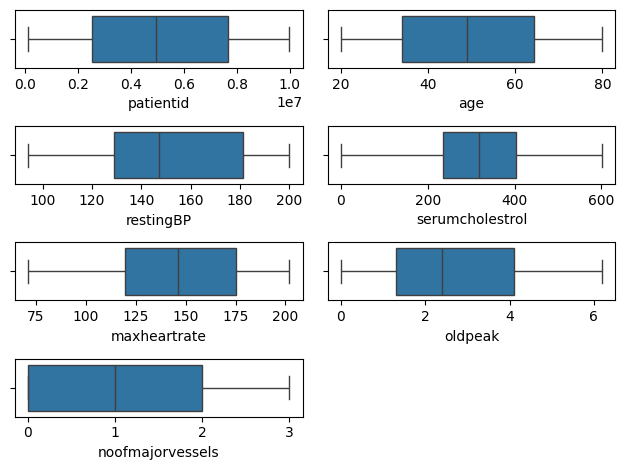

<Figure size 1500x1200 with 0 Axes>

In [13]:
numeric_features = ["patientid", "age", "restingBP",
              "serumcholestrol", "maxheartrate", "oldpeak", "noofmajorvessels"]
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4,2,i)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.figure(figsize=(15,12))
plt.show()

array([[<Axes: title={'center': 'patientid'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'chestpain'}>],
       [<Axes: title={'center': 'restingBP'}>,
        <Axes: title={'center': 'serumcholestrol'}>,
        <Axes: title={'center': 'fastingbloodsugar'}>,
        <Axes: title={'center': 'restingrelectro'}>],
       [<Axes: title={'center': 'maxheartrate'}>,
        <Axes: title={'center': 'exerciseangia'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'noofmajorvessels'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

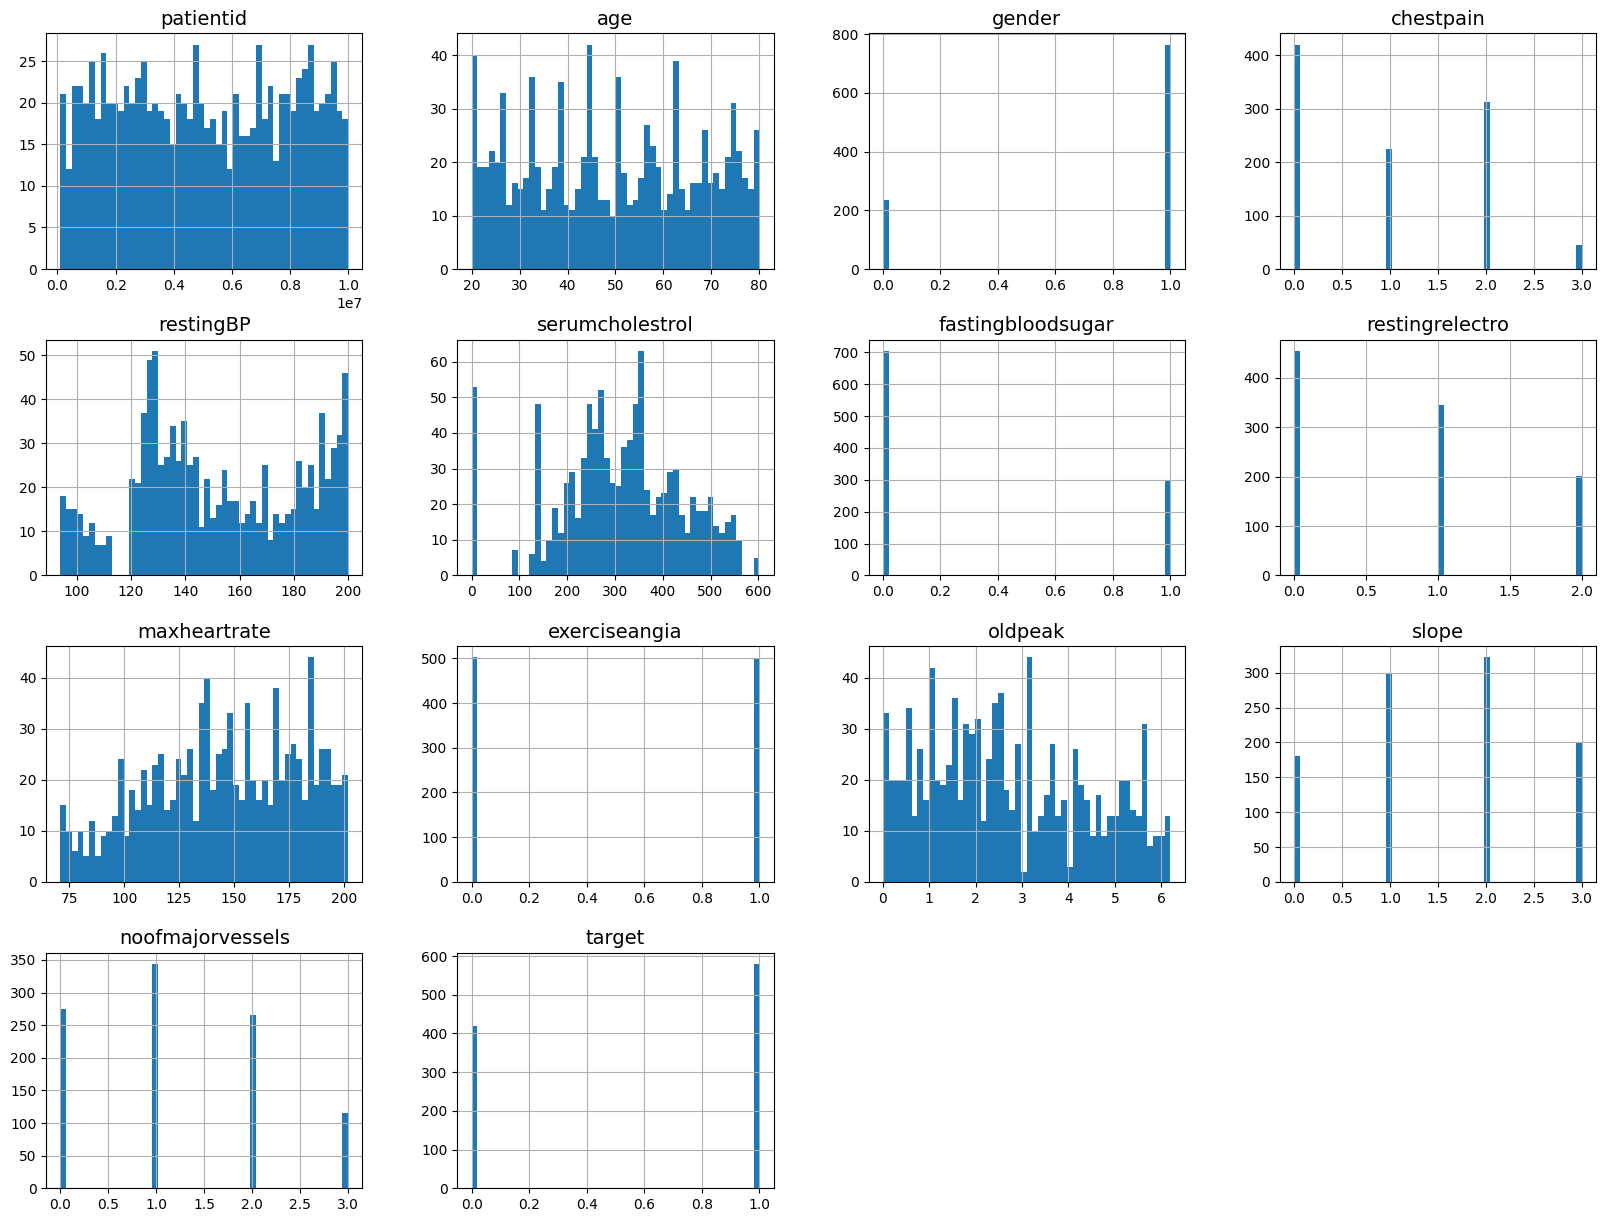

In [14]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50,figsize=(20,15))

array([[<Axes: xlabel='patientid', ylabel='patientid'>,
        <Axes: xlabel='age', ylabel='patientid'>,
        <Axes: xlabel='restingBP', ylabel='patientid'>,
        <Axes: xlabel='serumcholestrol', ylabel='patientid'>,
        <Axes: xlabel='maxheartrate', ylabel='patientid'>,
        <Axes: xlabel='oldpeak', ylabel='patientid'>,
        <Axes: xlabel='noofmajorvessels', ylabel='patientid'>],
       [<Axes: xlabel='patientid', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='restingBP', ylabel='age'>,
        <Axes: xlabel='serumcholestrol', ylabel='age'>,
        <Axes: xlabel='maxheartrate', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='noofmajorvessels', ylabel='age'>],
       [<Axes: xlabel='patientid', ylabel='restingBP'>,
        <Axes: xlabel='age', ylabel='restingBP'>,
        <Axes: xlabel='restingBP', ylabel='restingBP'>,
        <Axes: xlabel='serumcholestrol', ylabel='restingBP'>,
        <Axes: x

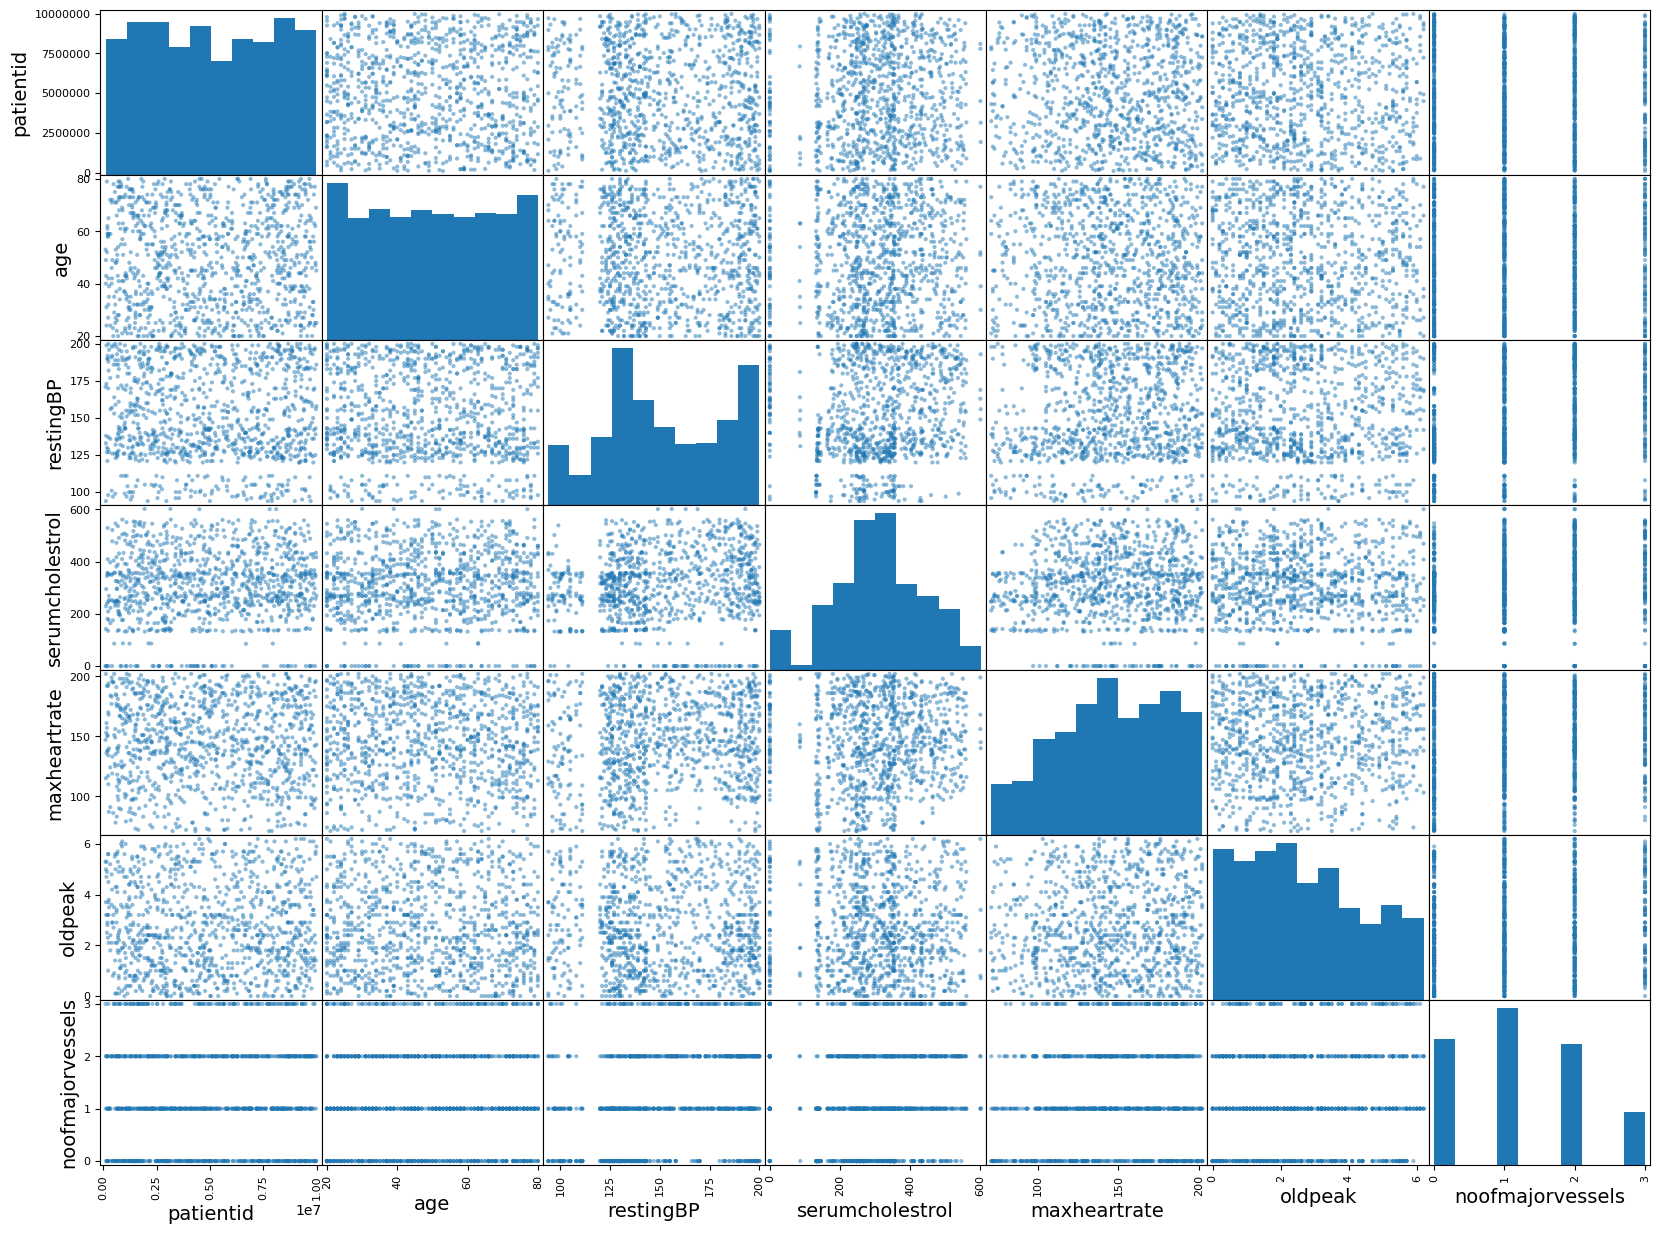

In [15]:
scatter_matrix(df[numeric_features], figsize=(20, 15))
plt.show()

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Numeric features')

<Figure size 2000x1500 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

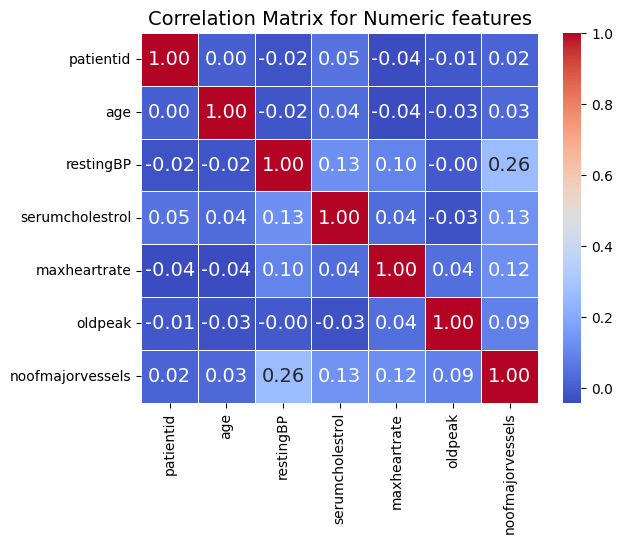

<Figure size 2000x1500 with 0 Axes>

In [16]:
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric features")
plt.figure(figsize=(20,15))
plt.show

(0.0, 1.0, 0.0, 1.0)

<Axes: xlabel='fastingbloodsugar', ylabel='gender'>

Text(0.5, 1.0, 'gender vs fastingbloodsugar')

<Axes: xlabel='exerciseangia', ylabel='gender'>

Text(0.5, 1.0, 'gender vs exerciseangia')

<Axes: xlabel='target', ylabel='gender'>

Text(0.5, 1.0, 'gender vs target')

<Axes: xlabel='gender', ylabel='fastingbloodsugar'>

Text(0.5, 1.0, 'fastingbloodsugar vs gender')

(0.0, 1.0, 0.0, 1.0)

<Axes: xlabel='exerciseangia', ylabel='fastingbloodsugar'>

Text(0.5, 1.0, 'fastingbloodsugar vs exerciseangia')

<Axes: xlabel='target', ylabel='fastingbloodsugar'>

Text(0.5, 1.0, 'fastingbloodsugar vs target')

<Axes: xlabel='gender', ylabel='exerciseangia'>

Text(0.5, 1.0, 'exerciseangia vs gender')

<Axes: xlabel='fastingbloodsugar', ylabel='exerciseangia'>

Text(0.5, 1.0, 'exerciseangia vs fastingbloodsugar')

(0.0, 1.0, 0.0, 1.0)

<Axes: xlabel='target', ylabel='exerciseangia'>

Text(0.5, 1.0, 'exerciseangia vs target')

<Axes: xlabel='gender', ylabel='target'>

Text(0.5, 1.0, 'target vs gender')

<Axes: xlabel='fastingbloodsugar', ylabel='target'>

Text(0.5, 1.0, 'target vs fastingbloodsugar')

<Axes: xlabel='exerciseangia', ylabel='target'>

Text(0.5, 1.0, 'target vs exerciseangia')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Joint Distribution of Binary Features')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<function matplotlib.pyplot.show(close=None, block=None)>

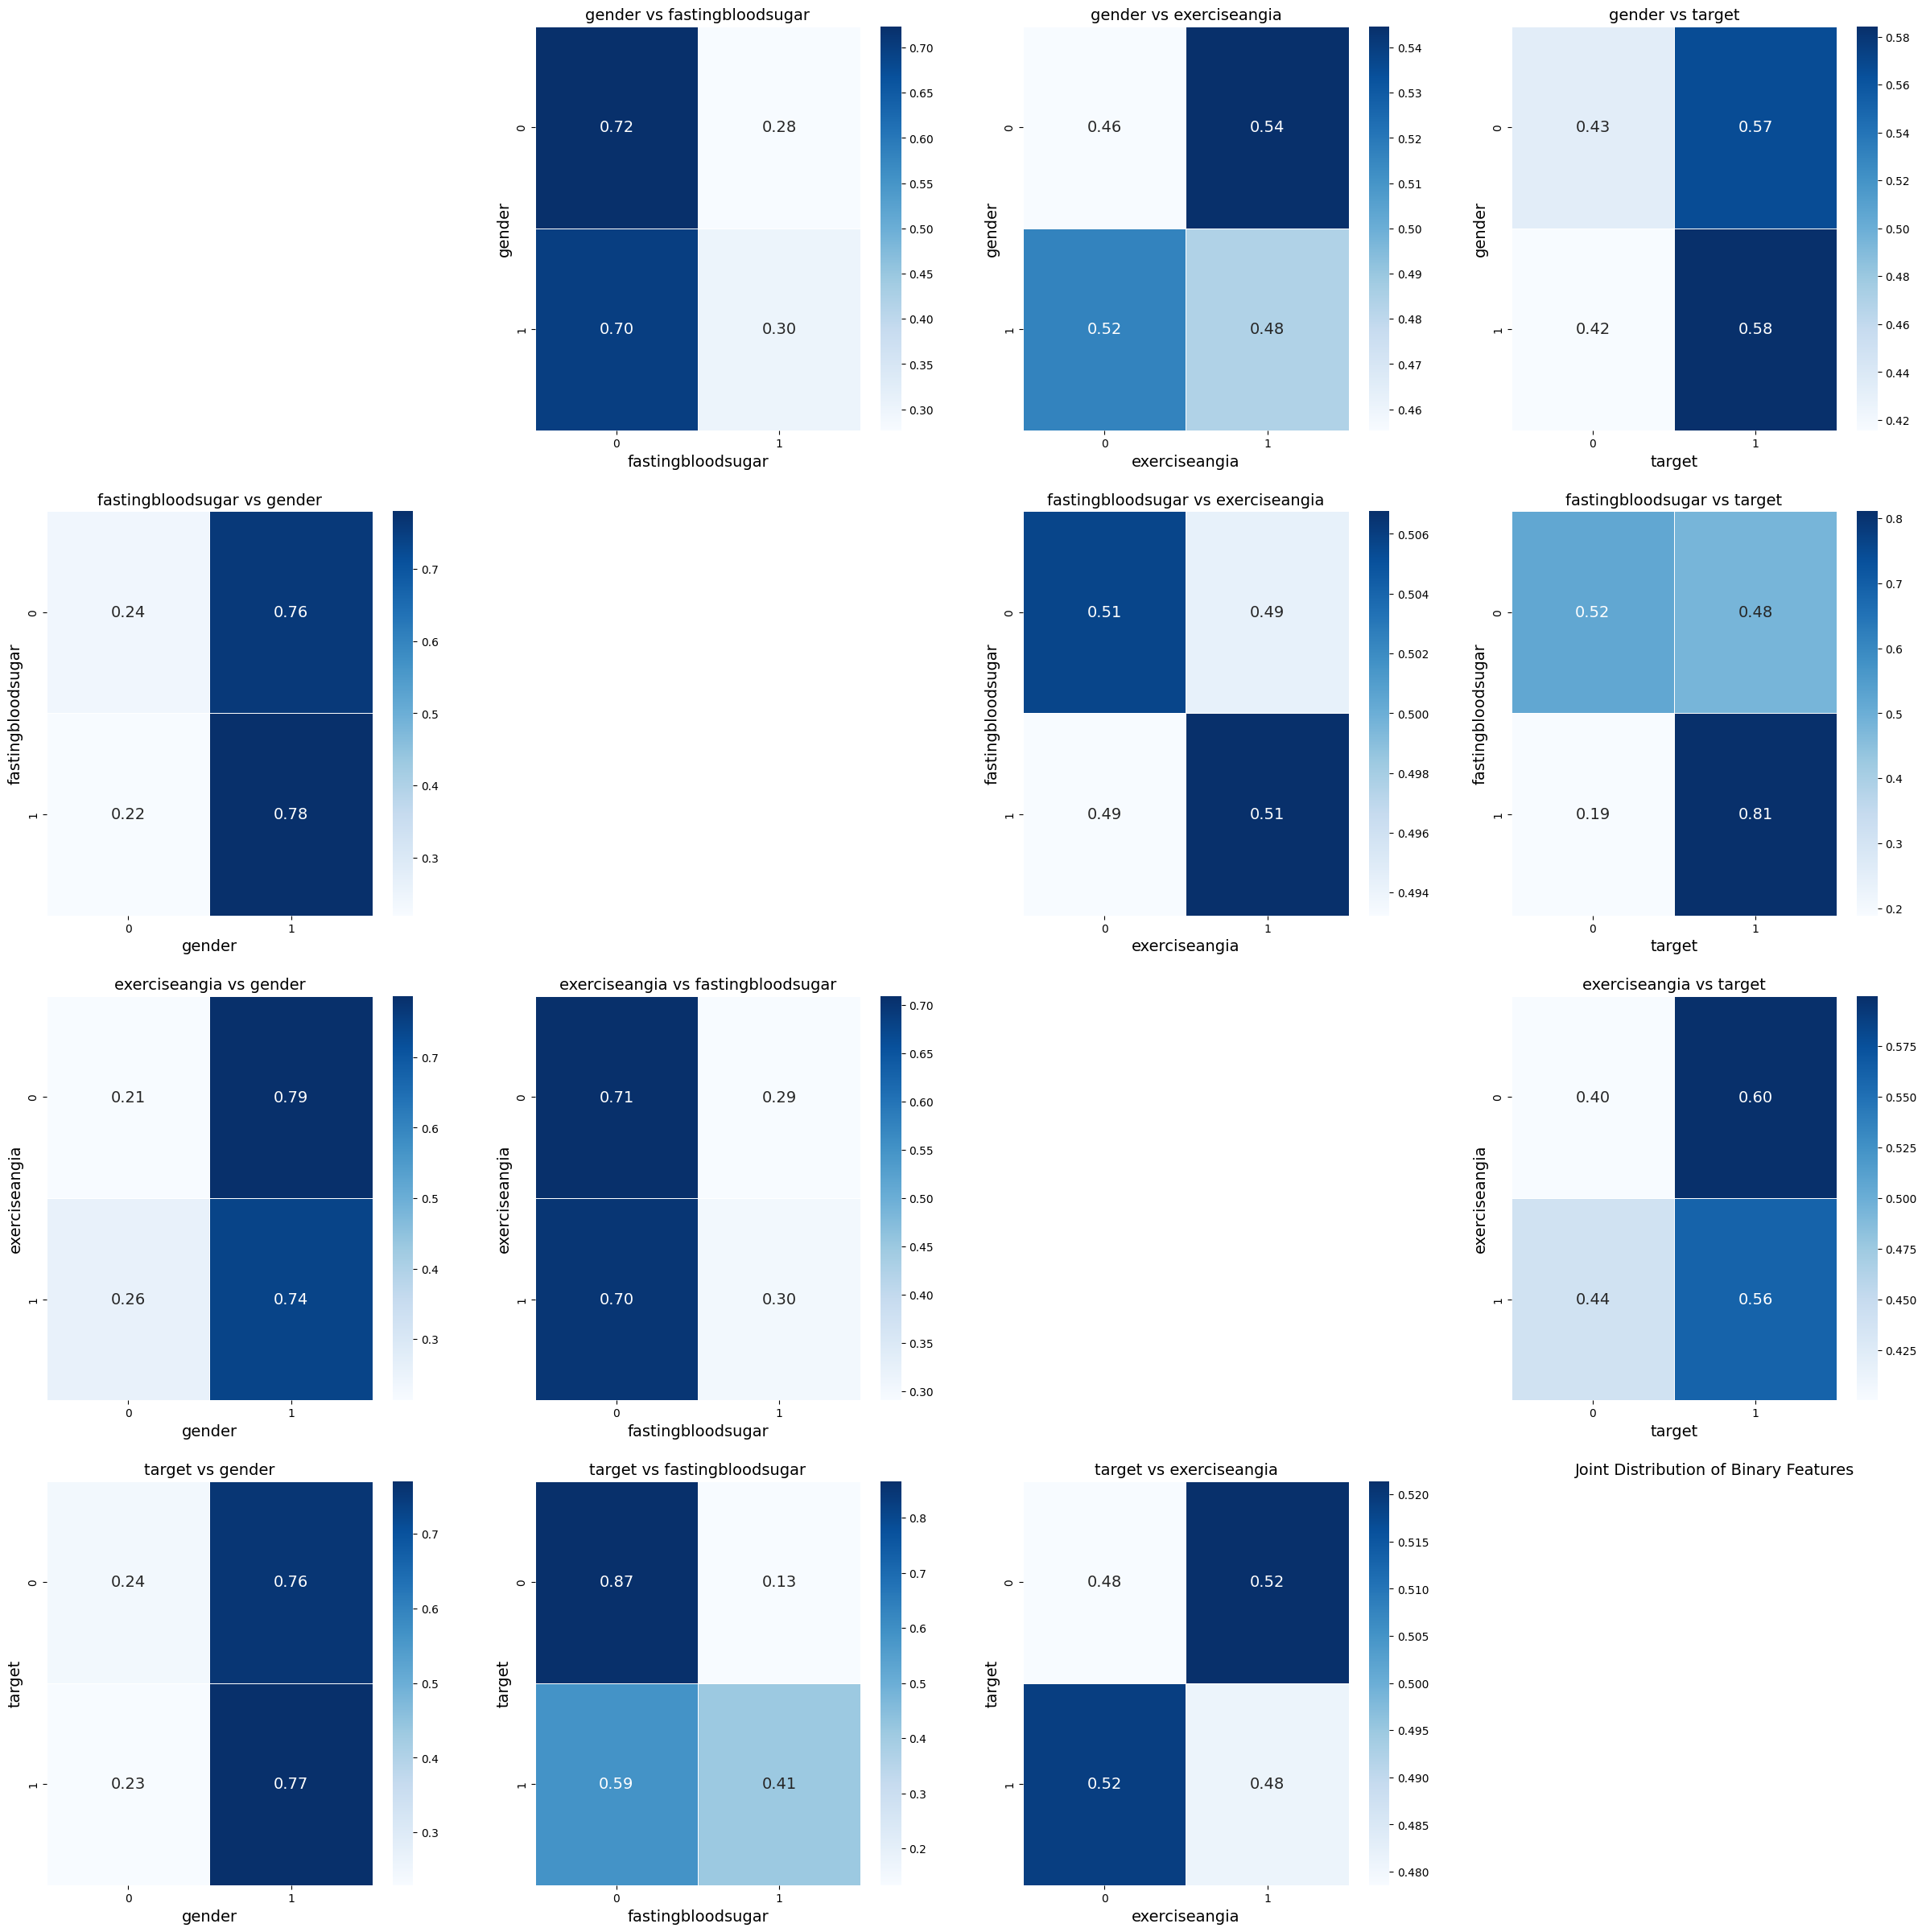

In [17]:
binary_features = ["gender", "fastingbloodsugar", "exerciseangia", "target"]

fig, axes = plt.subplots(len(binary_features), len(binary_features), figsize = (30,30))
for i, col1 in enumerate(binary_features):
    for j, col2 in enumerate(binary_features):
        if i != j:
            crosstab = pd.crosstab(df[col1], df[col2], normalize = 'index')
            sns.heatmap(crosstab, annot=True, cmap="Blues", ax=axes[i,j], fmt=".2f", linewidths=0.5)
            axes[i,j].set_title(f'{col1} vs {col2}')
        else:
            axes[i,j].axis('off')
plt.title("Joint Distribution of Binary Features")
plt.tight_layout
plt.show

<Axes: >

Text(0.5, 1.0, "Cramér's V Correlation Matrix of Numerical Features")

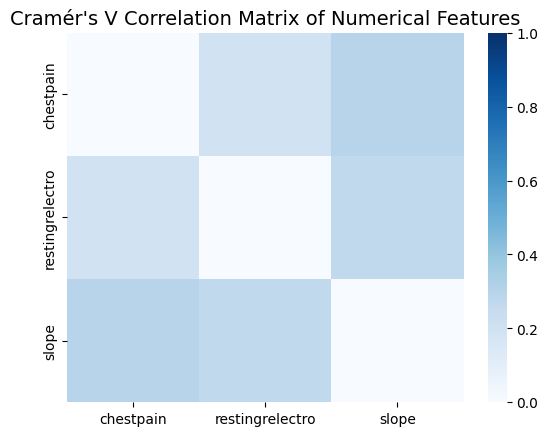

In [18]:
nominal_features = ["chestpain", "restingrelectro", "slope"]

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    from scipy.stats import chi2_contingency
    contigency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contigency_table)
    n = contigency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contigency_table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

corr_matrix = pd.DataFrame(np.zeros((len(nominal_features),len(nominal_features))),
                                    columns = nominal_features, index = nominal_features)

for i, col1 in enumerate(nominal_features):
    for j, col2 in enumerate(nominal_features):
        if i != j:
            corr_matrix.iloc[i, j] = cramers_v(df[col1], df[col2])

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='Blues', vmin=0, vmax=1, cbar=True)
plt.title('Cramér\'s V Correlation Matrix of Numerical Features')
plt.show()

Text(0.5, 1.02, 'Stacked Bar plots of Nominal Features and Target(Classification)')

<Axes: xlabel='chestpain'>

Text(0.5, 0, 'chestpain')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='restingrelectro'>

Text(0.5, 0, 'restingrelectro')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='slope'>

Text(0.5, 0, 'slope')

Text(0, 0.5, 'Proportion')

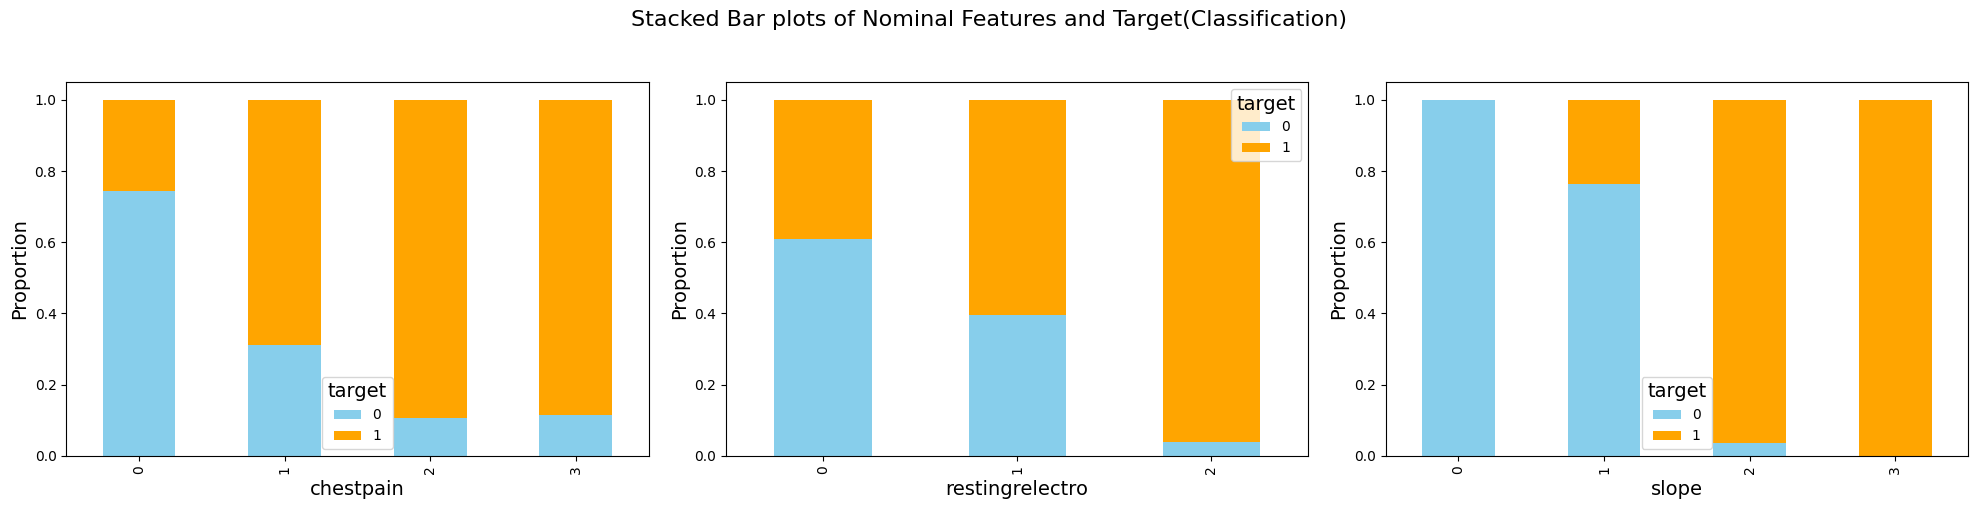

In [19]:
fig, axes = plt.subplots(1, len(nominal_features), figsize=(20, 5))
fig.suptitle('Stacked Bar plots of Nominal Features and Target(Classification)', fontsize=16, y=1.02)

# Plot stacked bar plots
for i, col in enumerate(nominal_features):
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Stacked Bar plots of binary Features and Target(Classification)')

<Axes: xlabel='gender'>

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='fastingbloodsugar'>

Text(0.5, 0, 'fastingbloodsugar')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='exerciseangia'>

Text(0.5, 0, 'exerciseangia')

Text(0, 0.5, 'Proportion')

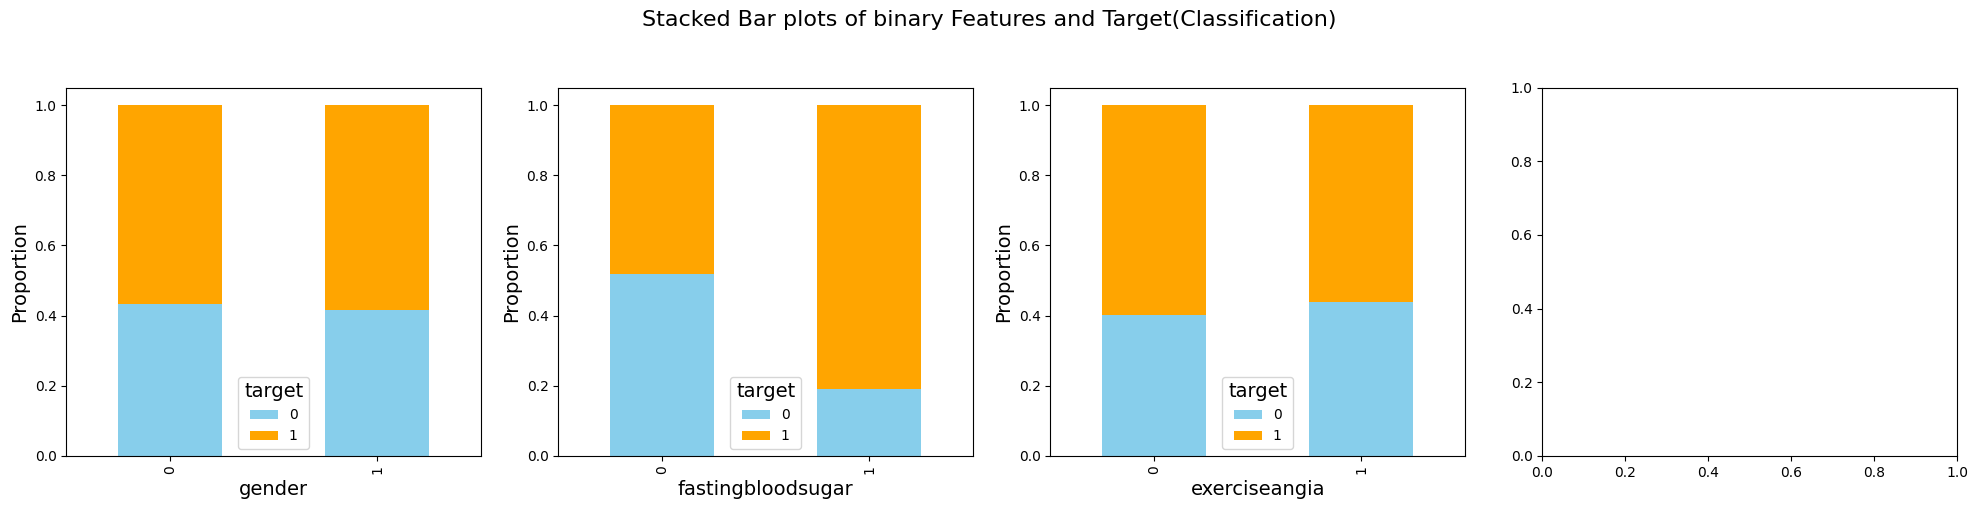

In [20]:
fig, axes = plt.subplots(1, len(binary_features), figsize=(20, 5))
fig.suptitle('Stacked Bar plots of binary Features and Target(Classification)', fontsize=16, y=1.02)

# Plot stacked bar plots
for i, col in enumerate(binary_features):
    if col != "target":
        crosstab = pd.crosstab(df[col], df['target'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange'])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Stacked Bar plots of Binary Features and Chestpain(Classification)')

<Axes: xlabel='gender'>

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='fastingbloodsugar'>

Text(0.5, 0, 'fastingbloodsugar')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='exerciseangia'>

Text(0.5, 0, 'exerciseangia')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='target'>

Text(0.5, 0, 'target')

Text(0, 0.5, 'Proportion')

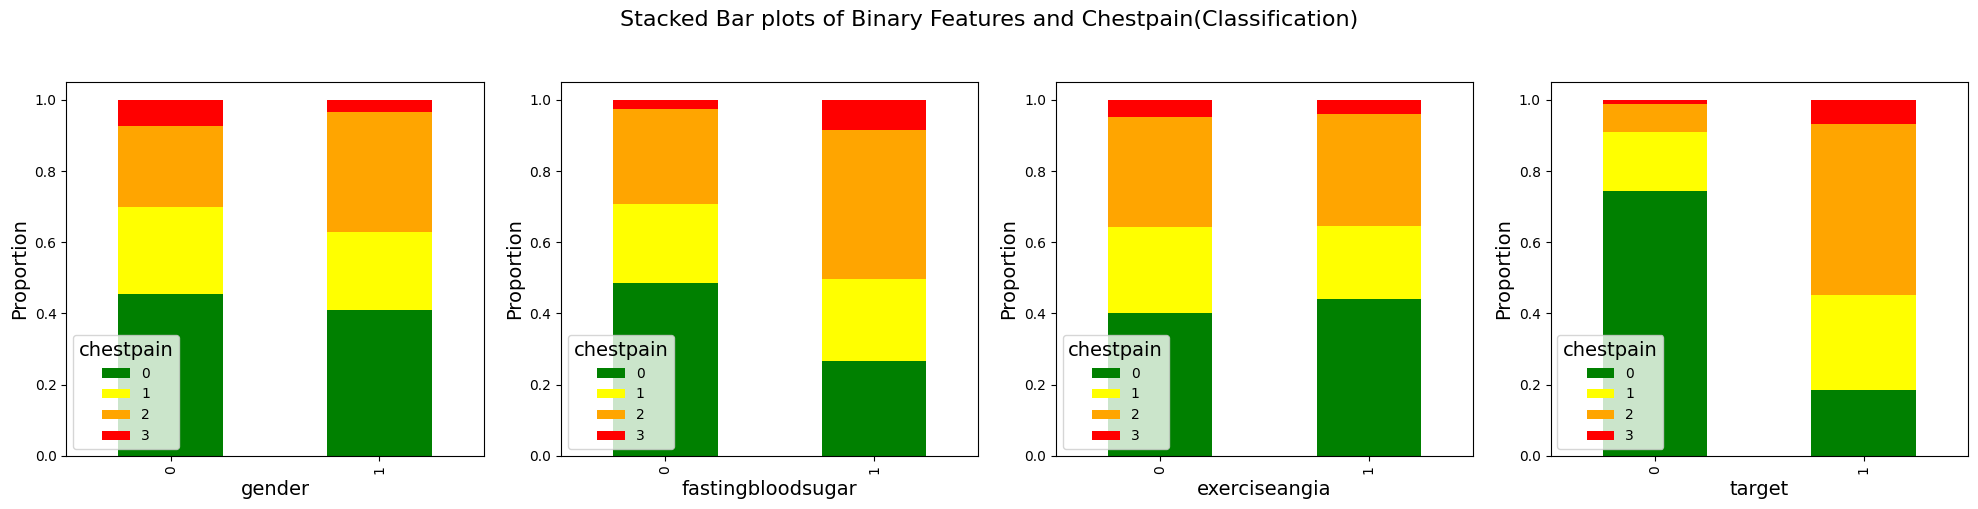

In [21]:
fig, axes = plt.subplots(1, len(binary_features), figsize=(20, 5))
fig.suptitle('Stacked Bar plots of Binary Features and Chestpain(Classification)', fontsize=16, y=1.02)

# Plot stacked bar plots
for i, col in enumerate(binary_features):
    crosstab = pd.crosstab(df[col], df['chestpain'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['green', 'yellow', 'orange','red'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Stacked Bar plots of Other Nominal Features and Chestpain(Classification)')

<Axes: xlabel='restingrelectro'>

Text(0.5, 0, 'restingrelectro')

Text(0, 0.5, 'Proportion')

<Axes: xlabel='slope'>

Text(0.5, 0, 'slope')

Text(0, 0.5, 'Proportion')

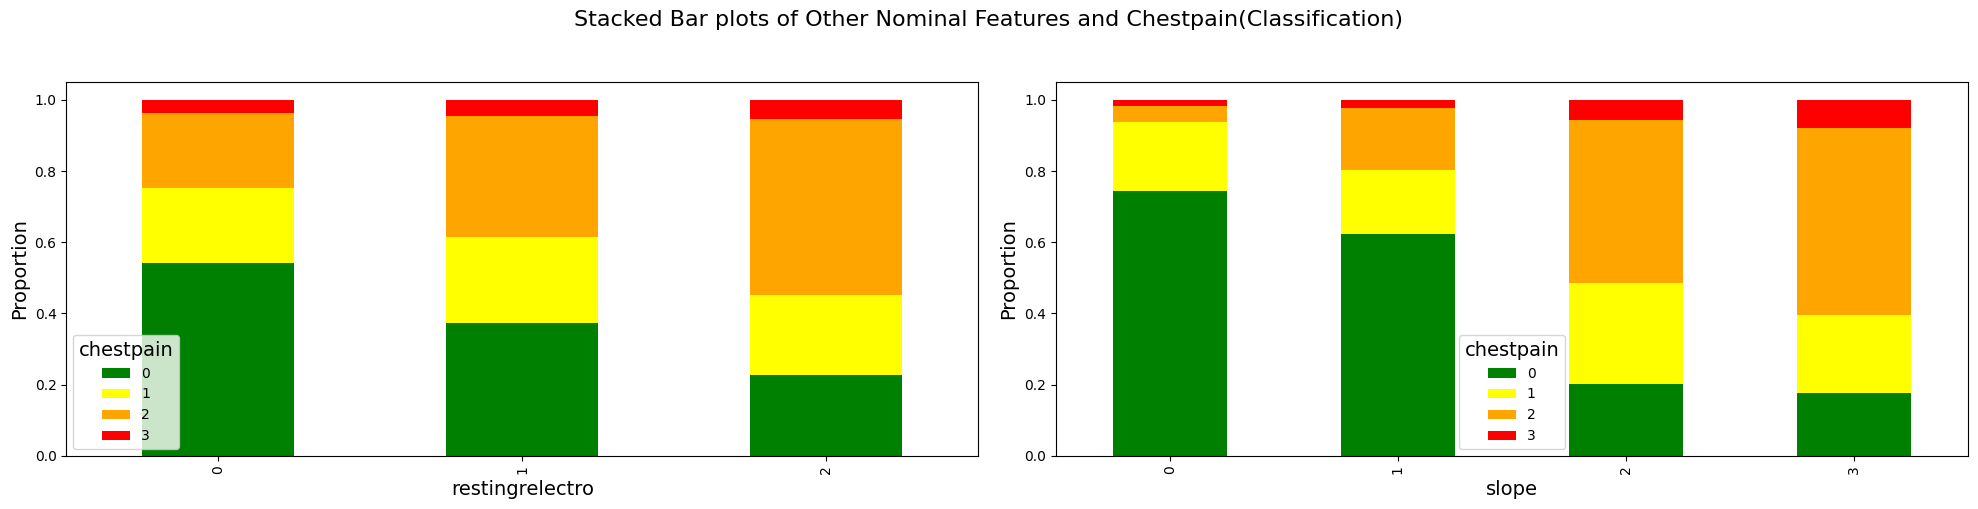

In [22]:
nominal_features_except_chestpain = ["restingrelectro", "slope"]

fig, axes = plt.subplots(1, len(nominal_features_except_chestpain), figsize=(20, 5))
fig.suptitle('Stacked Bar plots of Other Nominal Features and Chestpain(Classification)', fontsize=16, y=1.02)

# Plot stacked bar plots
for i, col in enumerate(nominal_features_except_chestpain):
    crosstab = pd.crosstab(df[col], df['chestpain'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['green', 'yellow', 'orange','red'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


# Feature Engineering

In [23]:
# One-Hot Encoding for Nominal Categorical Variables
nominal_features = ['chestpain', 'restingrelectro', 'slope']
df2 = pd.get_dummies(df, columns=nominal_features, drop_first=False).astype(int)
df3 = df2.rename(columns={'chestpain_0': 'chestpain_typical_angina',
                          'chestpain_1': 'chestpain_atypical_angina',
                          'chestpain_2': 'chestpain_non_anginal_pain',
                          'chestpain_3': 'chestpain_asymptomatic',
                          'restingrelectro_0': 'restingrelectro_normal_Value',
                          'restingrelectro_1': 'restingrelectro_ST_T_wave_abnormality',
                          'restingrelectro_2': 'restingrelectro_left_ventricular_hypertrophy',
                          'slope_1': 'slope_upsloping',
                          'slope_2': 'slope_flat',
                          'slope_3': 'slope_downsloping'})
df3.head()

patientid  age  gender  restingBP  serumcholestrol  fastingbloodsugar  \
0     103368   53       1        171                0                  0   
1     119250   40       1         94              229                  0   
2     119372   49       1        133              142                  0   
3     132514   43       1        138              295                  1   
4     146211   31       1        199                0                  0   

   maxheartrate  exerciseangia  oldpeak  noofmajorvessels  ...  \
0           147              0        5                 3  ...   
1           115              0        3                 1  ...   
2           202              1        5                 0  ...   
3           153              0        3                 2  ...   
4           136              0        5                 2  ...   

   chestpain_atypical_angina  chestpain_non_anginal_pain  \
0                          0                           1   
1                          0                           0   
2                          0                           1   
3                          0                           0   
4                          1                           0   

   chestpain_asymptomatic  restingrelectro_normal_Value  \
0                       0                             0   
1                       0                             0   
2                       0                             1   
3                       0                             0   
4                       0                             0   

   restingrelectro_ST_T_wave_abnormality  \
0                                      1   
1                                      1   
2                                      0   
3                                      1   
4                                      0   

   restingrelectro_left_ventricular_hypertrophy  slope_0  slope_upsloping  \
0                                             0        0                0   
1                                             0        0                1   
2                                             0        0                1   
3                                             0        0                0   
4                                             1        0                0   

   slope_flat  slope_downsloping  
0           0                  1  
1           0                  0  
2           0                  0  
3           1                  0  
4           0                  1  

[5 rows x 22 columns]

In [24]:
# Creating Interaction Terms
df3['maxheartrate_gender_adjusted'] = (df3['maxheartrate'] / (1.0 if df3['gender'].mean() == 1 else 0.9)).round(3)
df3['BP_Cho_Interaction'] = df3['restingBP'] * df3['serumcholestrol']
df3['chestpain_typical_exerciseangina'] = df3['chestpain_typical_angina'] * df3['exerciseangia']
df3.head()

patientid  age  gender  restingBP  serumcholestrol  fastingbloodsugar  \
0     103368   53       1        171                0                  0   
1     119250   40       1         94              229                  0   
2     119372   49       1        133              142                  0   
3     132514   43       1        138              295                  1   
4     146211   31       1        199                0                  0   

   maxheartrate  exerciseangia  oldpeak  noofmajorvessels  ...  \
0           147              0        5                 3  ...   
1           115              0        3                 1  ...   
2           202              1        5                 0  ...   
3           153              0        3                 2  ...   
4           136              0        5                 2  ...   

   restingrelectro_normal_Value  restingrelectro_ST_T_wave_abnormality  \
0                             0                                      1   
1                             0                                      1   
2                             1                                      0   
3                             0                                      1   
4                             0                                      0   

   restingrelectro_left_ventricular_hypertrophy  slope_0  slope_upsloping  \
0                                             0        0                0   
1                                             0        0                1   
2                                             0        0                1   
3                                             0        0                0   
4                                             1        0                0   

   slope_flat  slope_downsloping  maxheartrate_gender_adjusted  \
0           0                  1                       163.333   
1           0                  0                       127.778   
2           0                  0                       224.444   
3           1                  0                       170.000   
4           0                  1                       151.111   

   BP_Cho_Interaction  chestpain_typical_exerciseangina  
0                   0                                 0  
1               21526                                 0  
2               18886                                 0  
3               40710                                 0  
4                   0                                 0  

[5 rows x 25 columns]

In [25]:
# Binning Continuous Variables
df3['Age_Bin'] = pd.cut(df3['age'], bins=[20, 40, 60, 80], labels=[0, 1, 2], include_lowest=True).astype(int)
df3['Oldpeak_Bin'] = pd.cut(df3['oldpeak'], bins=[0, 2, 4, 6.2], labels=[0, 1, 2], include_lowest=True).astype(int)

# Feature Extraction
df3['Heart_Stress_Index'] = (df3['restingBP'] / df3['maxheartrate']).round(3)
df3['Vascular_Health'] = (df3['noofmajorvessels'] * df3['serumcholestrol']).round(3)
df3["220-age"] = 200-df3["age"]

df = df3
df.head()

patientid  age  gender  restingBP  serumcholestrol  fastingbloodsugar  \
0     103368   53       1        171                0                  0   
1     119250   40       1         94              229                  0   
2     119372   49       1        133              142                  0   
3     132514   43       1        138              295                  1   
4     146211   31       1        199                0                  0   

   maxheartrate  exerciseangia  oldpeak  noofmajorvessels  ...  slope_flat  \
0           147              0        5                 3  ...           0   
1           115              0        3                 1  ...           0   
2           202              1        5                 0  ...           0   
3           153              0        3                 2  ...           1   
4           136              0        5                 2  ...           0   

   slope_downsloping  maxheartrate_gender_adjusted  BP_Cho_Interaction  \
0                  1                       163.333                   0   
1                  0                       127.778               21526   
2                  0                       224.444               18886   
3                  0                       170.000               40710   
4                  1                       151.111                   0   

   chestpain_typical_exerciseangina  Age_Bin  Oldpeak_Bin  Heart_Stress_Index  \
0                                 0        1            2               1.163   
1                                 0        0            1               0.817   
2                                 0        1            2               0.658   
3                                 0        1            1               0.902   
4                                 0        0            2               1.463   

   Vascular_Health  220-age  
0                0      147  
1              229      160  
2                0      151  
3              590      157  
4                0      169  

[5 rows x 30 columns]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'restingBP'}>,
        <Axes: title={'center': 'serumcholestrol'}>,
        <Axes: title={'center': 'fastingbloodsugar'}>],
       [<Axes: title={'center': 'maxheartrate'}>,
        <Axes: title={'center': 'exerciseangia'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'noofmajorvessels'}>,
        <Axes: title={'center': 'target'}>],
       [<Axes: title={'center': 'chestpain_typical_angina'}>,
        <Axes: title={'center': 'chestpain_atypical_angina'}>,
        <Axes: title={'center': 'chestpain_non_anginal_pain'}>,
        <Axes: title={'center': 'chestpain_asymptomatic'}>,
        <Axes: title={'center': 'restingrelectro_normal_Value'}>],
       [<Axes: title={'center': 'restingrelectro_ST_T_wave_abnormality'}>,
        <Axes: title={'center': 'restingrelectro_left_ventricular_hypertrophy'}>,
        <Axes: title={'center': 'slope_0'

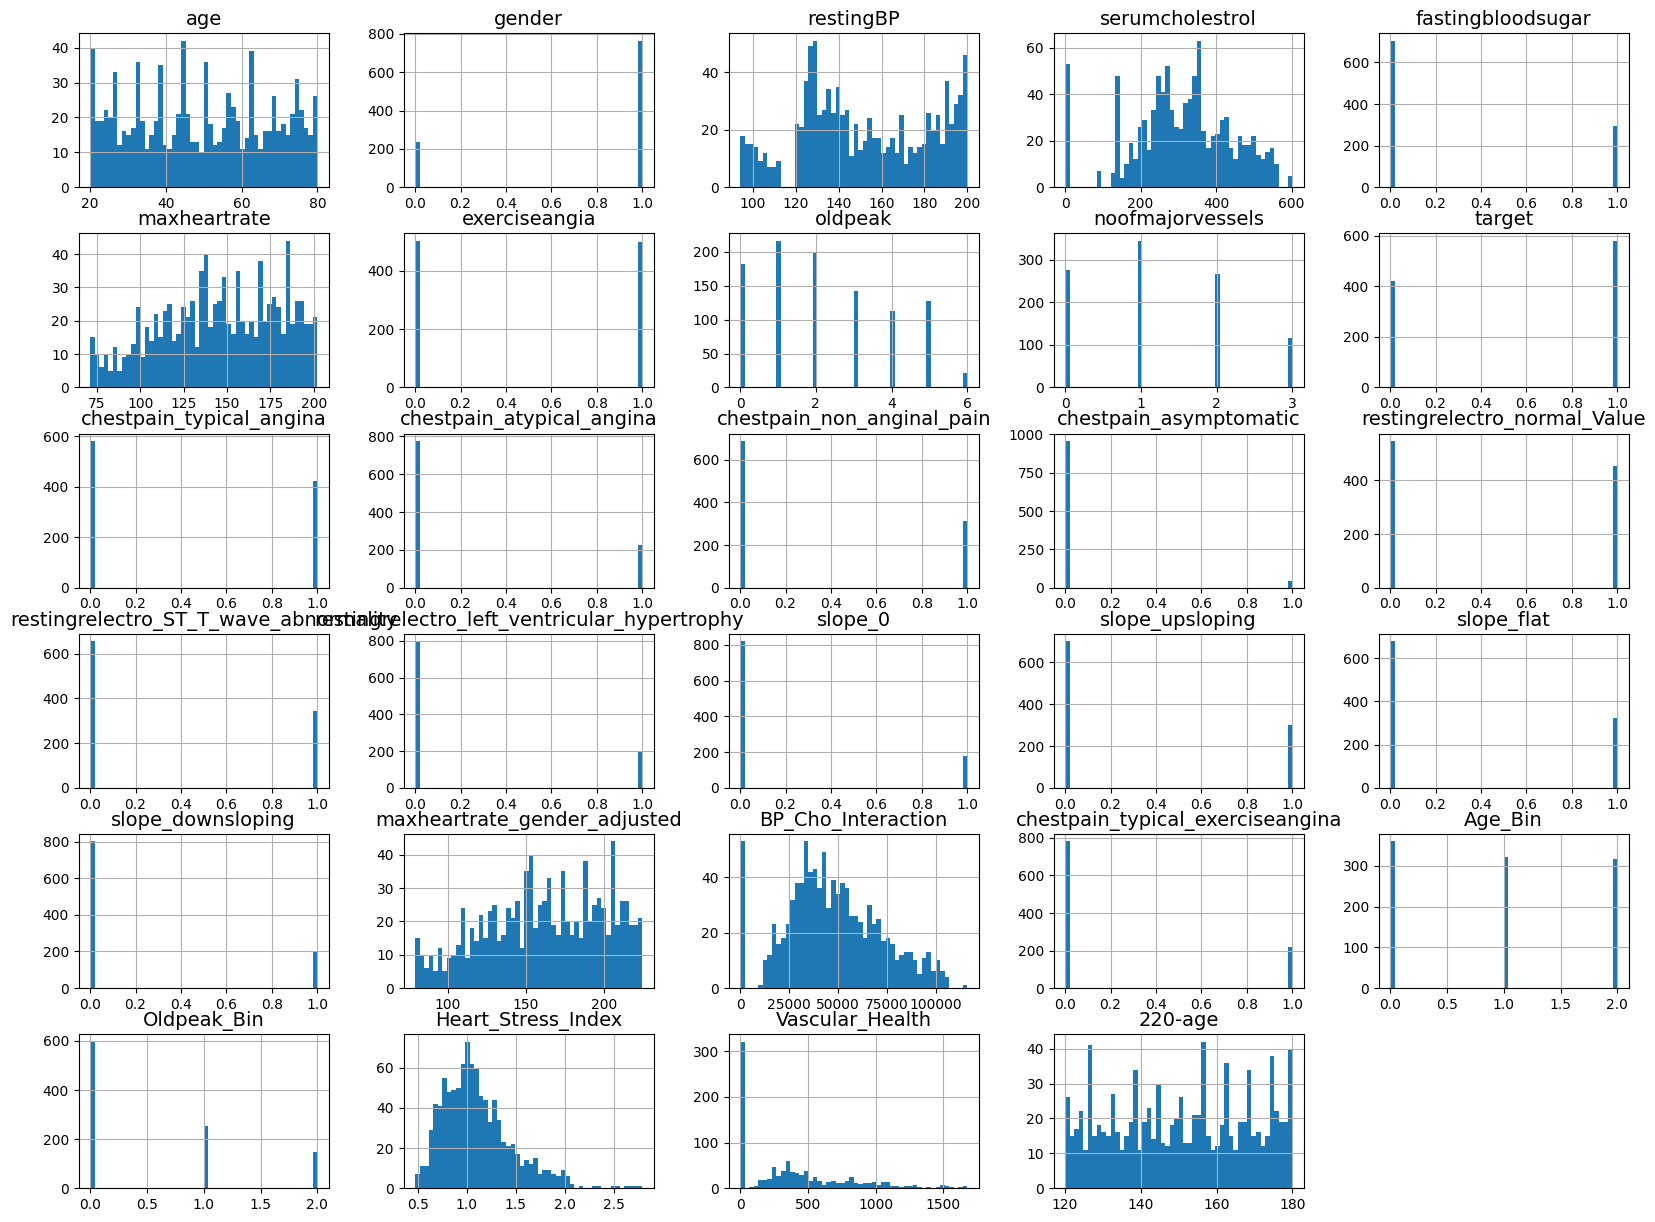

In [26]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.drop(columns=['patientid'], inplace=True)
df.hist(bins=50,figsize=(20,15))


numeric_features = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak", "noofmajorvessels",
                         "maxheartrate_gender_adjusted", "220-age", "BP_Cho_Interaction", "Heart_Stress_Index", "Vascular_Health"]
binary_features = ["gender", "fastingbloodsugar", "exerciseangia", "target", "chestpain_typical_angina", "chestpain_atypical_angina",
                  "chestpain_non_anginal_pain", "chestpain_asymptomatic", "restingrelectro_normal_Value",
                   "restingrelectro_ST_T_wave_abnormality", "restingrelectro_left_ventricular_hypertrophy", "slope_0",
                   "slope_upsloping", "slope_flat", "slope_downsloping", "chestpain_typical_exerciseangina"]
catogorical_features = ["Age_Bin", "Oldpeak_Bin"]

In [27]:
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak',
                      'noofmajorvessels', 'maxheartrate_gender_adjusted', 'BP_Cho_Interaction',
                      'Heart_Stress_Index', 'Vascular_Health']

categorical_features = ['gender', 'fastingbloodsugar', 'exerciseangia', 'chestpain_typical_angina',
                        'chestpain_atypical_angina', 'chestpain_non_anginal_pain', 'chestpain_asymptomatic',
                        'restingrelectro_normal_Value', 'restingrelectro_ST_T_wave_abnormality',
                        'restingrelectro_left_ventricular_hypertrophy', 'slope_upsloping', 'slope_flat',
                        'slope_downsloping']

ordinal_features = ['Age_Bin', 'Oldpeak_Bin']

target_variable = 'target'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age                                           1000 non-null   int64  
 1   gender                                        1000 non-null   int64  
 2   restingBP                                     1000 non-null   int64  
 3   serumcholestrol                               1000 non-null   int64  
 4   fastingbloodsugar                             1000 non-null   int64  
 5   maxheartrate                                  1000 non-null   int64  
 6   exerciseangia                                 1000 non-null   int64  
 7   oldpeak                                       1000 non-null   int64  
 8   noofmajorvessels                              1000 non-null   int64  
 9   target                                        1000 non-null   in

In [29]:
# --- Checking Missing Values ---
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age                                             0
gender                                          0
restingBP                                       0
serumcholestrol                                 0
fastingbloodsugar                               0
maxheartrate                                    0
exerciseangia                                   0
oldpeak                                         0
noofmajorvessels                                0
target                                          0
chestpain_typical_angina                        0
chestpain_atypical_angina                       0
chestpain_non_anginal_pain                      0
chestpain_asymptomatic                          0
restingrelectro_normal_Value                    0
restingrelectro_ST_T_wave_abnormality           0
restingrelectro_left_ventricular_hypertrophy    0
slope_0                                         0
slope_upsloping                                 0
slope_flat                        

In [30]:
# --- Summary Statistics ---
summary_statistics = df.describe()
print("\nSummary Statistics:")
display(summary_statistics)


Summary Statistics:


age       gender    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.000000      1000.000000   
mean     49.24200     0.765000   151.747000       311.447000   
std      17.86473     0.424211    29.965228       132.443801   
min      20.00000     0.000000    94.000000         0.000000   
25%      34.00000     1.000000   129.000000       235.750000   
50%      49.00000     1.000000   147.000000       318.000000   
75%      64.25000     1.000000   181.000000       404.250000   
max      80.00000     1.000000   200.000000       602.000000   

       fastingbloodsugar  maxheartrate  exerciseangia      oldpeak  \
count        1000.000000   1000.000000    1000.000000  1000.000000   
mean            0.296000    145.477000       0.498000     2.255000   
std             0.456719     34.190268       0.500246     1.722481   
min             0.000000     71.000000       0.000000     0.000000   
25%             0.000000    119.750000       0.000000     1.000000   
50%             0.000000    146.000000       0.000000     2.000000   
75%             1.000000    175.000000       1.000000     4.000000   
max             1.000000    202.000000       1.000000     6.000000   

       noofmajorvessels       target  ...   slope_flat  slope_downsloping  \
count       1000.000000  1000.000000  ...  1000.000000        1000.000000   
mean           1.222000     0.580000  ...     0.322000           0.199000   
std            0.977585     0.493805  ...     0.467477           0.399448   
min            0.000000     0.000000  ...     0.000000           0.000000   
25%            0.000000     0.000000  ...     0.000000           0.000000   
50%            1.000000     1.000000  ...     0.000000           0.000000   
75%            2.000000     1.000000  ...     1.000000           0.000000   
max            3.000000     1.000000  ...     1.000000           1.000000   

       maxheartrate_gender_adjusted  BP_Cho_Interaction  \
count                   1000.000000         1000.000000   
mean                     161.641101        47762.779000   
std                       37.989180        24139.546699   
min                       78.889000            0.000000   
25%                      133.055250        31609.000000   
50%                      162.222000        45279.000000   
75%                      194.444000        64345.500000   
max                      224.444000       116186.000000   

       chestpain_typical_exerciseangina      Age_Bin  Oldpeak_Bin  \
count                       1000.000000  1000.000000  1000.000000   
mean                           0.219000     0.958000     0.552000   
std                            0.413776     0.822747     0.738811   
min                            0.000000     0.000000     0.000000   
25%                            0.000000     0.000000     0.000000   
50%                            0.000000     1.000000     0.000000   
75%                            0.000000     2.000000     1.000000   
max                            1.000000     2.000000     2.000000   

       Heart_Stress_Index  Vascular_Health     220-age  
count         1000.000000       1000.00000  1000.00000  
mean             1.105918        397.71600   150.75800  
std              0.355458        397.63397    17.86473  
min              0.473000          0.00000   120.00000  
25%              0.846000          0.00000   135.75000  
50%              1.046000        336.00000   151.00000  
75%              1.287000        603.75000   166.00000  
max              2.789000       1677.00000   180.00000  

[8 rows x 29 columns]

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Count Plot of Target')

Text(0.5, 0, 'Quality')

Text(0, 0.5, 'Count')

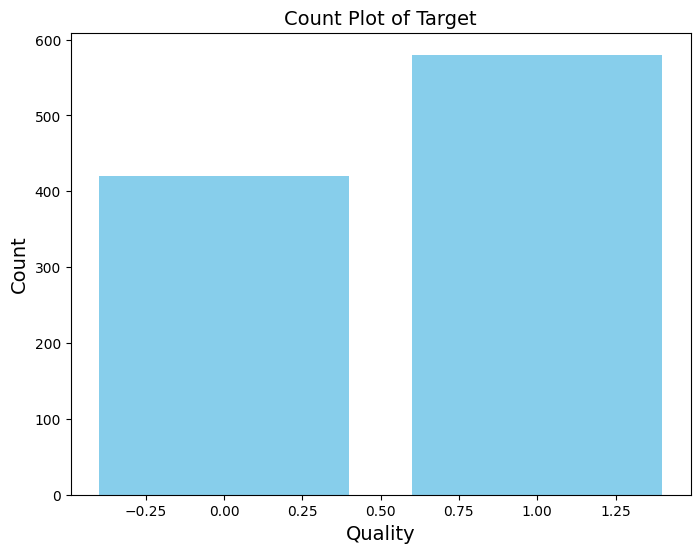

In [31]:
quality_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='skyblue')
plt.title('Count Plot of Target')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<Figure size 1400x3000 with 0 Axes>

<Axes: >

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age | Skewness: 0.03')

<Axes: >

<Axes: xlabel='restingBP', ylabel='Count'>

Text(0.5, 1.0, 'restingBP | Skewness: 0.02')

<Axes: >

<Axes: xlabel='serumcholestrol', ylabel='Count'>

Text(0.5, 1.0, 'serumcholestrol | Skewness: -0.31')

<Axes: >

<Axes: xlabel='maxheartrate', ylabel='Count'>

Text(0.5, 1.0, 'maxheartrate | Skewness: -0.25')

<Axes: >

<Axes: xlabel='oldpeak', ylabel='Count'>

Text(0.5, 1.0, 'oldpeak | Skewness: 0.38')

<Axes: >

<Axes: xlabel='noofmajorvessels', ylabel='Count'>

Text(0.5, 1.0, 'noofmajorvessels | Skewness: 0.29')

<Axes: >

<Axes: xlabel='maxheartrate_gender_adjusted', ylabel='Count'>

Text(0.5, 1.0, 'maxheartrate_gender_adjusted | Skewness: -0.25')

<Axes: >

<Axes: xlabel='BP_Cho_Interaction', ylabel='Count'>

Text(0.5, 1.0, 'BP_Cho_Interaction | Skewness: 0.23')

<Axes: >

<Axes: xlabel='Heart_Stress_Index', ylabel='Count'>

Text(0.5, 1.0, 'Heart_Stress_Index | Skewness: 1.08')

<Axes: >

<Axes: xlabel='Vascular_Health', ylabel='Count'>

Text(0.5, 1.0, 'Vascular_Health | Skewness: 0.98')

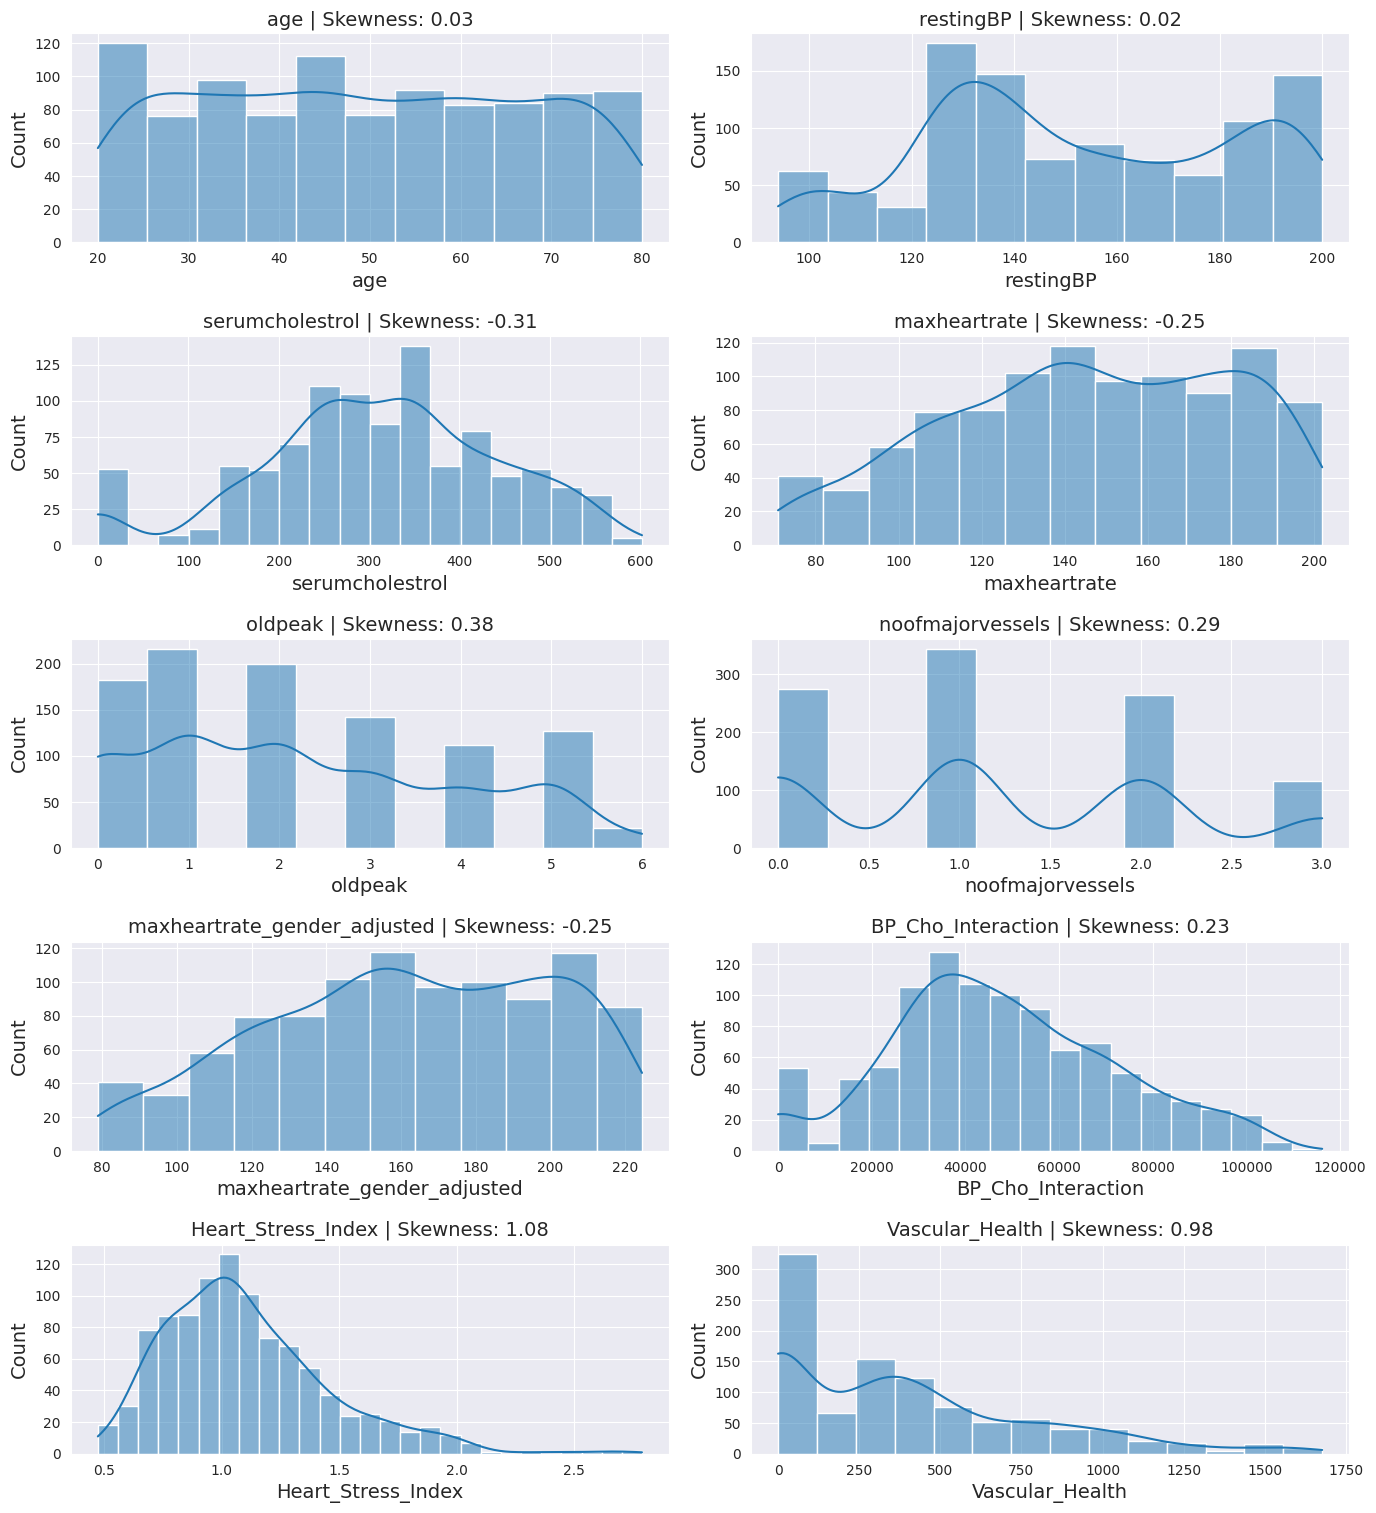

In [32]:
sns.set_style("darkgrid")

plt.figure(figsize=(14, len(numerical_features) * 3))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [33]:
print(numerical_features)

['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak', 'noofmajorvessels', 'maxheartrate_gender_adjusted', 'BP_Cho_Interaction', 'Heart_Stress_Index', 'Vascular_Health']


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

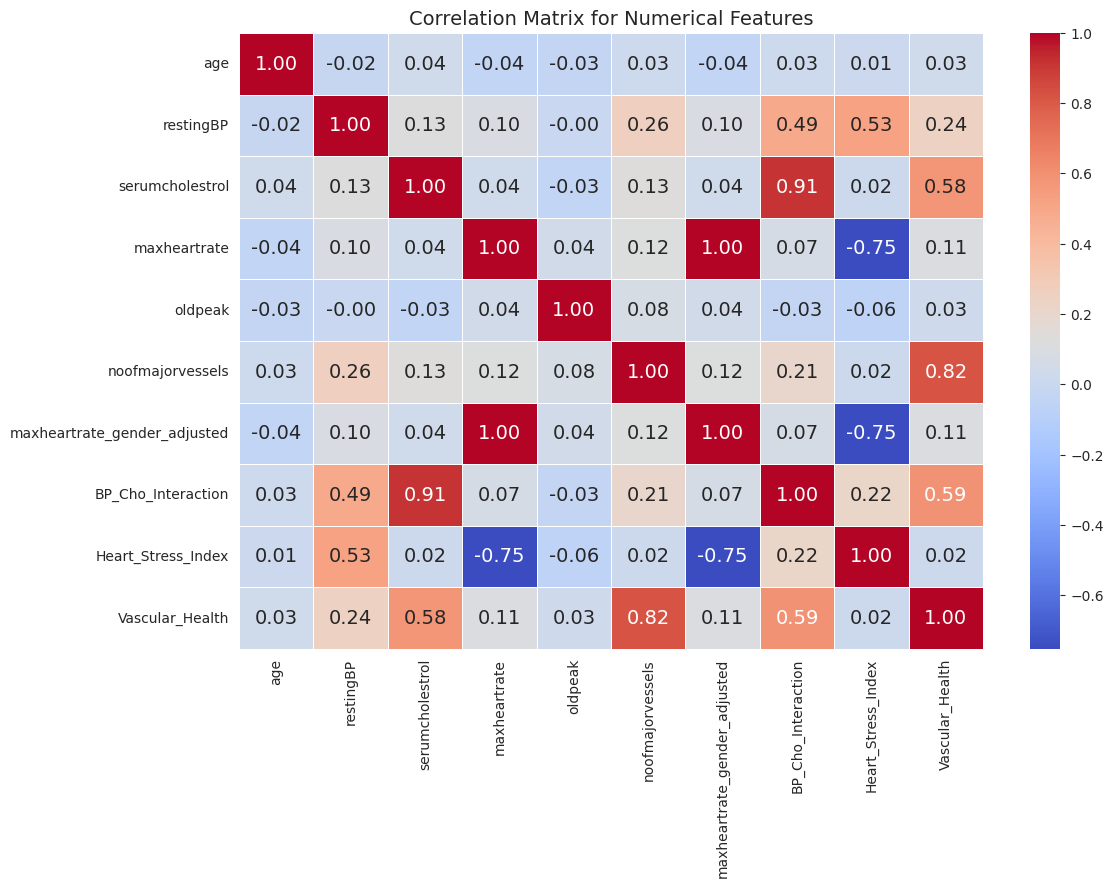

In [34]:
# --- Bivariate Analysis ---
# Correlation Matrix for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

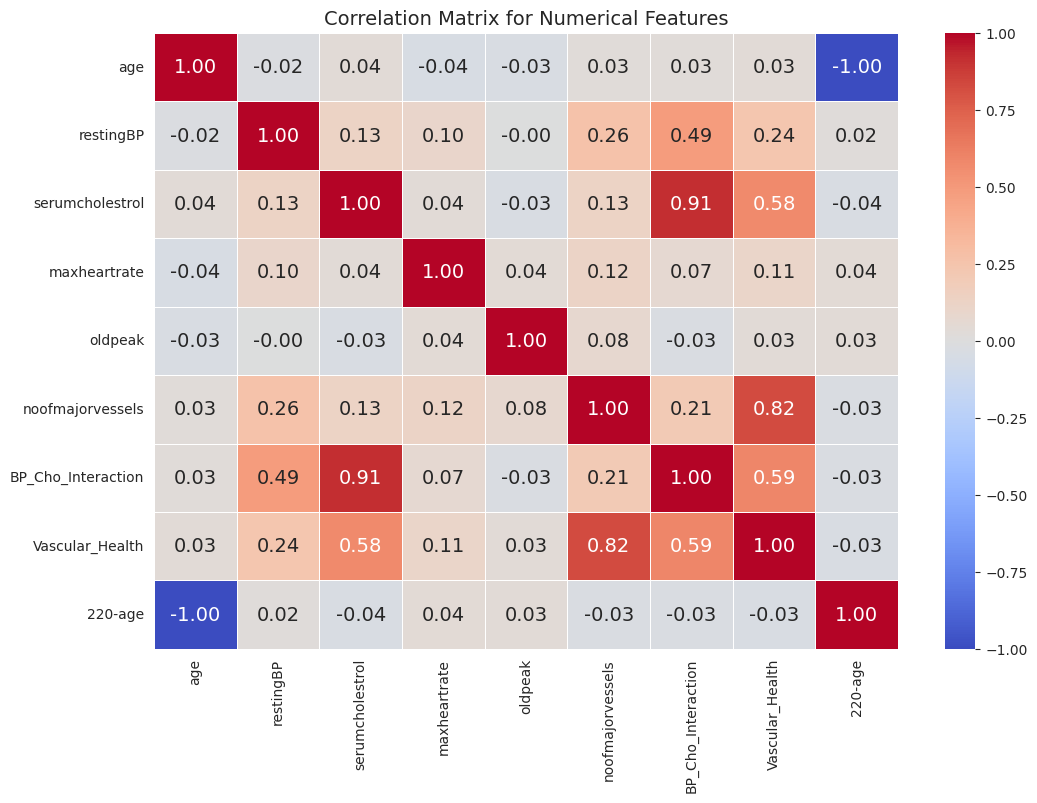

In [35]:
numerical_features_2 = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak', 'noofmajorvessels',
 'BP_Cho_Interaction', 'Vascular_Health',"220-age"]

# --- Bivariate Analysis ---
# Correlation Matrix for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features_2].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

<Figure size 1000x800 with 0 Axes>

<ipython-input-36-af8817950d72>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="target", y="age", data=df, palette='viridis')


<Axes: xlabel='target', ylabel='age'>

Text(0.5, 1.0, 'Swarm Plot for target and age')

Text(0.5, 58.7222222222222, 'target')

Text(92.09722222222221, 0.5, 'age')

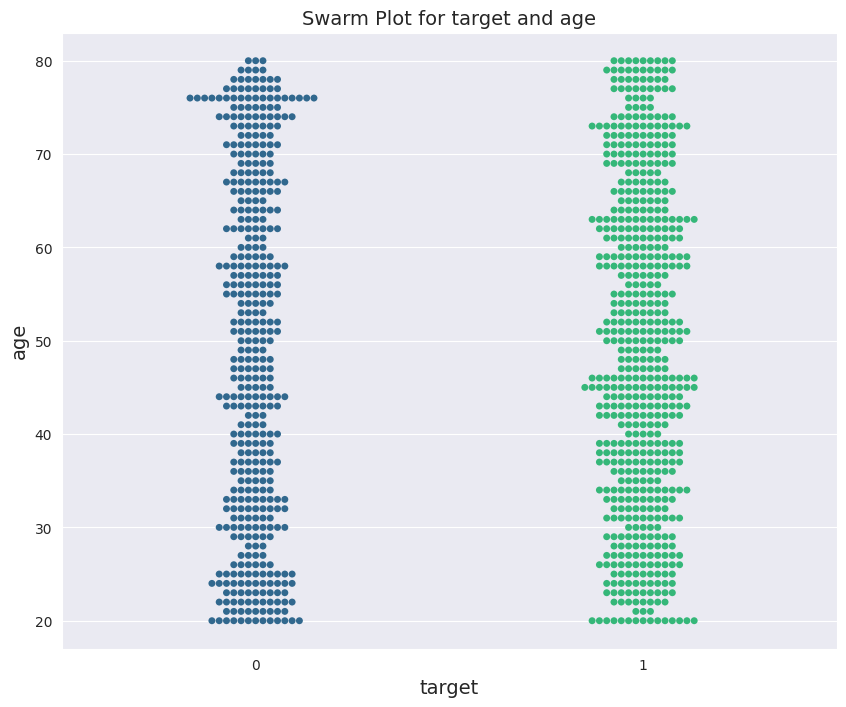

In [36]:
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak',
                      'noofmajorvessels', 'maxheartrate_gender_adjusted', 'BP_Cho_Interaction',
                      'Heart_Stress_Index', 'Vascular_Health']

plt.figure(figsize=(10, 8))
sns.swarmplot(x="target", y="age", data=df, palette='viridis')
plt.title('Swarm Plot for target and age')
plt.xlabel('target')
plt.ylabel('age')
plt.show()

<Axes: ylabel='age'>

Text(0.5, 1.0, 'Boxplot of age')

<Axes: ylabel='restingBP'>

Text(0.5, 1.0, 'Boxplot of restingBP')

<Axes: ylabel='serumcholestrol'>

Text(0.5, 1.0, 'Boxplot of serumcholestrol')

<Axes: ylabel='maxheartrate'>

Text(0.5, 1.0, 'Boxplot of maxheartrate')

<Axes: ylabel='oldpeak'>

Text(0.5, 1.0, 'Boxplot of oldpeak')

<Axes: ylabel='noofmajorvessels'>

Text(0.5, 1.0, 'Boxplot of noofmajorvessels')

<Axes: ylabel='maxheartrate_gender_adjusted'>

Text(0.5, 1.0, 'Boxplot of maxheartrate_gender_adjusted')

<Axes: ylabel='BP_Cho_Interaction'>

Text(0.5, 1.0, 'Boxplot of BP_Cho_Interaction')

<Axes: ylabel='Heart_Stress_Index'>

Text(0.5, 1.0, 'Boxplot of Heart_Stress_Index')

<Axes: ylabel='Vascular_Health'>

Text(0.5, 1.0, 'Boxplot of Vascular_Health')

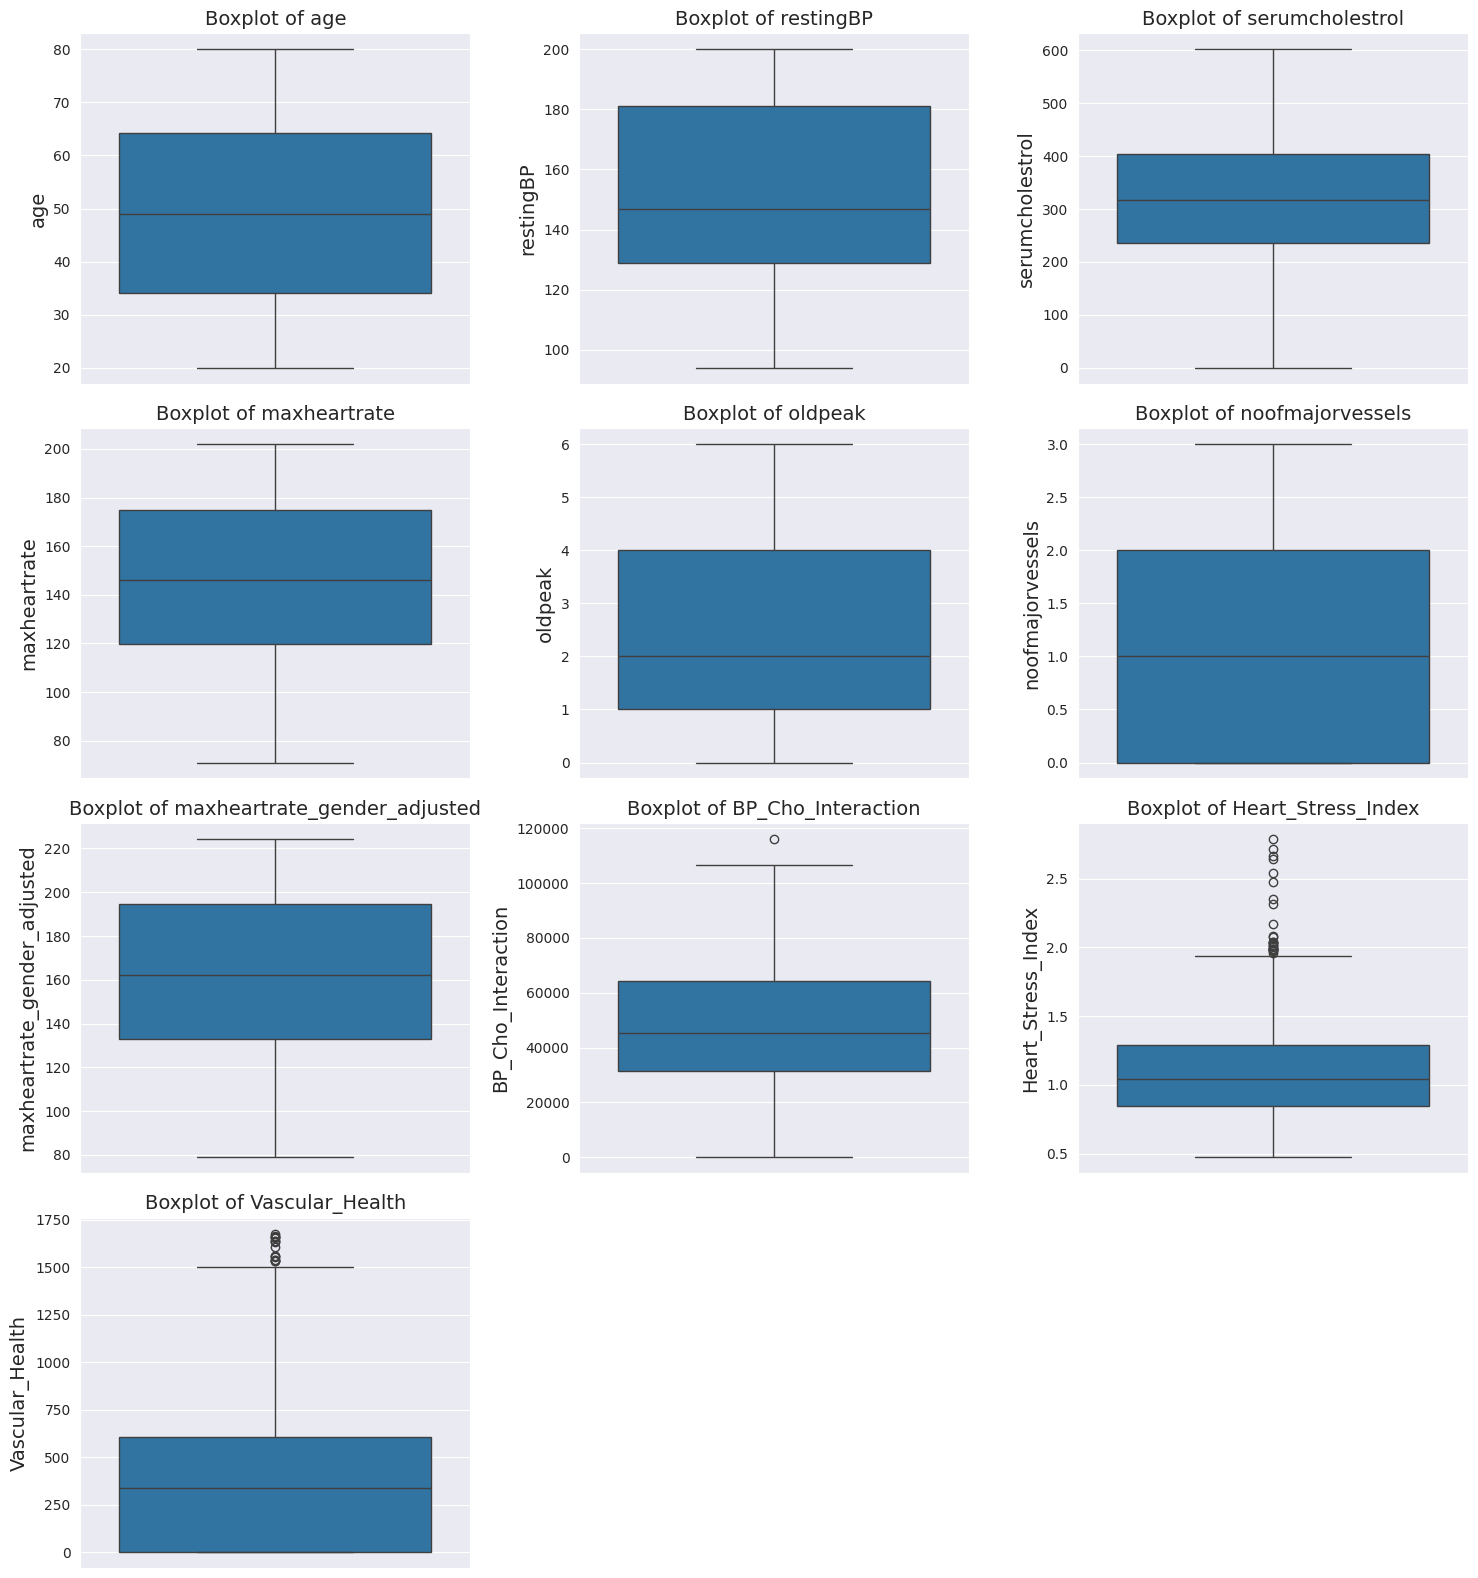

In [37]:
# --- Outlier Detection ---
# Set number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Dynamic size

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each numerical feature and plot
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i])  # Vertical boxplot for readability
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots (if len(numerical_features) < n_rows * n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='target', ylabel='maxheartrate'>

Text(0.5, 1.0, 'Distribution of Max Heart Rate by Target Variable')

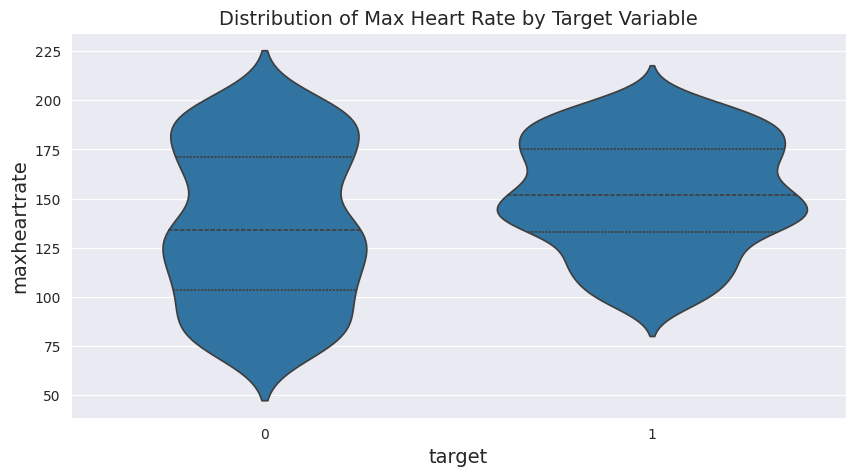

In [38]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["target"], y=df["maxheartrate"], inner="quartile")
plt.title("Distribution of Max Heart Rate by Target Variable")
plt.show()


# 2 Major Tasks


1. Predict which patient will present heart disease.
   -->  Logistic Regression [X: S.No2-13; Y: Target (S.No14)].
2. Predict the maximum heart rate achieved.
   --> Regression [X: S.No2-8, 10-14; Y: maxheartrate(S.No9)]


# Task 1


In [81]:
df.head()

age  gender  restingBP  serumcholestrol  fastingbloodsugar  maxheartrate  \
0   53       1        171                0                  0           147   
1   40       1         94              229                  0           115   
2   49       1        133              142                  0           202   
3   43       1        138              295                  1           153   
4   31       1        199                0                  0           136   

   exerciseangia  oldpeak  noofmajorvessels  target  ...  slope_flat  \
0              0        5                 3       1  ...           0   
1              0        3                 1       0  ...           0   
2              1        5                 0       0  ...           0   
3              0        3                 2       1  ...           1   
4              0        5                 2       1  ...           0   

   slope_downsloping  maxheartrate_gender_adjusted  BP_Cho_Interaction  \
0                  1                       163.333                   0   
1                  0                       127.778               21526   
2                  0                       224.444               18886   
3                  0                       170.000               40710   
4                  1                       151.111                   0   

   chestpain_typical_exerciseangina  Age_Bin  Oldpeak_Bin  Heart_Stress_Index  \
0                                 0        1            2               1.163   
1                                 0        0            1               0.817   
2                                 0        1            2               0.658   
3                                 0        1            1               0.902   
4                                 0        0            2               1.463   

   Vascular_Health  220-age  
0                0      147  
1              229      160  
2                0      151  
3              590      157  
4                0      169  

[5 rows x 29 columns]

## Logistic Regression

In [82]:
X_LR = df.drop(columns=["target"])
y_LR = df["target"]

train_ratio = 0.8
val_ratio = 0.10
test_ratio = 0.10

X_train, X_temp, y_train, y_temp = train_test_split(
    X_LR, y_LR, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

Train size: 800, Validation size: 100, Test size: 100


In [83]:
# Define features to scale
all_features_to_scale = ['restingBP', 'serumcholestrol', 'oldpeak', 'age', 'maxheartrate_gender_adjusted', '220-age', 'BP_Cho_Interaction', 'Heart_Stress_Index', 'Vascular_Health']

# Apply StandardScaler to selected features
scaler_X = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[all_features_to_scale] = scaler_X.fit_transform(X_train[all_features_to_scale])
X_val_scaled[all_features_to_scale] = scaler_X.transform(X_val[all_features_to_scale])
X_test_scaled[all_features_to_scale] = scaler_X.transform(X_test[all_features_to_scale])

# Check for NaNs in dataset
if X_train_scaled.isna().any().any():
    raise ValueError("Dataset contains NaN values. Please clean the data before training.")

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on training set to compute Training Accuracy
y_train_pred = log_reg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on validation set
y_val_pred = log_reg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy scores
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Print detailed validation performance
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))


LogisticRegression(max_iter=1000, random_state=42)

Training Accuracy: 0.9712
Validation Accuracy: 0.9800
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        62

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### GridSearchCV

In [84]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Compatible solvers for l1 and l2
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Perform Grid Search with Cross Validation
log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_log_reg = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# Predict on training set to compute Training Accuracy
y_train_pred = best_log_reg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on validation set
y_val_pred = best_log_reg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy scores
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Print detailed validation performance
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 0.9712
Validation Accuracy: 0.9800
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        62

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Random Forest

In [85]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)


# Compute Training Accuracy
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on validation set
y_val_pred = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Compute evaluation metrics
precision = precision_score(y_val, y_val_pred, average="binary")
recall = recall_score(y_val, y_val_pred, average="binary")
f1 = f1_score(y_val, y_val_pred, average="binary")

# Print accuracy scores
print(f"Training Accuracy of the Random Forest Model: {train_accuracy:.2%}")
print(f"Validation Accuracy of the Random Forest Model: {val_accuracy:.2%}")

# Print detailed evaluation metrics
print(f"Precision of the Random Forest Model : {precision:.2%}")
print(f"Recall of the Random Forest Model : {recall:.2%}")
print(f"F1 score of the Random Forest Model : {f1:.2%}")

RandomForestClassifier(random_state=42)

Training Accuracy of the Random Forest Model: 94.12%
Validation Accuracy of the Random Forest Model: 94.00%
Precision of the Random Forest Model : 98.28%
Recall of the Random Forest Model : 91.94%
F1 score of the Random Forest Model : 95.00%


## Gredient Boosting

In [86]:
# Predict on training, validation, and test sets using the first model
rf_train_pred = model.predict(X_train_scaled).reshape(-1, 1)
rf_val_pred = model.predict(X_val_scaled).reshape(-1, 1)
rf_test_pred = model.predict(X_test_scaled).reshape(-1, 1)

# Train Gradient Boosting Classifier on predictions from the first model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(rf_train_pred, y_train)

# Compute training accuracy
y_gb_train_pred = gb_model.predict(rf_train_pred)
gb_train_accuracy = accuracy_score(y_train, y_gb_train_pred)

# Predict on validation set
y_gb_pred = gb_model.predict(rf_val_pred)
gb_val_accuracy = accuracy_score(y_val, y_gb_pred)

# Compute evaluation metrics
gb_precision = precision_score(y_val, y_gb_pred, average="binary")
gb_recall = recall_score(y_val, y_gb_pred, average="binary")
gb_f1 = f1_score(y_val, y_gb_pred, average="binary")

# Print accuracy scores
print(f"Training Accuracy of the Gradient Boosting Model: {gb_train_accuracy:.2%}")
print(f"Validation Accuracy of the Gradient Boosting Model: {gb_val_accuracy:.2%}")

# Print detailed evaluation metrics
print(f"Precision of the Gradient Boosting Model : {gb_precision:.2%}")
print(f"Recall of the Gradient Boosting Model : {gb_recall:.2%}")
print(f"F1 score of the Gradient Boosting Model : {gb_f1:.2%}")

GradientBoostingClassifier(random_state=42)

Training Accuracy of the Gradient Boosting Model: 94.12%
Validation Accuracy of the Gradient Boosting Model: 94.00%
Precision of the Gradient Boosting Model : 98.28%
Recall of the Gradient Boosting Model : 91.94%
F1 score of the Gradient Boosting Model : 95.00%


## Stacking

In [87]:
# Define base models (level-0 models)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))  # Ensure probability=True for stacking
]

# Define the meta-model (level-1 model)
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking classifier on training data
stacking_clf.fit(X_train_scaled, y_train)  # Use scaled data if needed

# Predict on training set to compute Training Accuracy
y_train_pred = stacking_clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on validation set
y_stack_pred = stacking_clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_stack_pred)

# Compute other evaluation metrics
stacking_precision = precision_score(y_val, y_stack_pred, average="binary")
stacking_recall = recall_score(y_val, y_stack_pred, average="binary")
stacking_f1 = f1_score(y_val, y_stack_pred, average="binary")

# Print accuracy scores
print(f"Training Accuracy of the Stacking Model: {train_accuracy:.2%}")
print(f"Validation Accuracy of the Stacking Model: {val_accuracy:.2%}")

# Print detailed evaluation metrics
print(f"Precision of the Stacking Model : {stacking_precision:.2%}")
print(f"Recall of the Stacking Model : {stacking_recall:.2%}")
print(f"F1 score of the Stacking Model : {stacking_f1:.2%}")

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

Training Accuracy of the Stacking Model: 100.00%
Validation Accuracy of the Stacking Model: 99.00%
Precision of the Stacking Model : 100.00%
Recall of the Stacking Model : 98.39%
F1 score of the Stacking Model : 99.19%


# SVM Model

In [88]:

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # You can tweak hyperparameters

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the training set to compute Training Accuracy
y_train_pred = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display detailed classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


SVC(random_state=42)

Training Accuracy: 0.6562
Validation Accuracy: 0.7600
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.79      0.50      0.61        38
           1       0.75      0.92      0.83        62

    accuracy                           0.76       100
   macro avg       0.77      0.71      0.72       100
weighted avg       0.77      0.76      0.75       100



## Improving SVM model

In [89]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Higher C reduces underfitting
    'gamma': ['scale', 0.1, 0.01, 0.001],  # Adjust kernel influence
    'kernel': ['rbf']  # RBF Kernel
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [90]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=100, gamma= 0.001, random_state=42)  # You can tweak hyperparameters

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the training set to compute Training Accuracy
y_train_pred = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display detailed classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

SVC(C=100, gamma=0.001, random_state=42)

Training Accuracy: 0.9688
Validation Accuracy: 0.9800
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        62

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Neural Networks

In [91]:
# Initialize the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers: 128 and 64 neurons
                          activation='relu',   # ReLU activation function
                          solver='adam',       # Adam optimizer
                          alpha=0.0001,        # L2 regularization (default)
                          max_iter=500,        # Number of training iterations
                          random_state=42)

# Train the model on the training data
mlp_model.fit(X_train_scaled, y_train)
y_train_pred = mlp_model.predict(X_train_scaled)
# Predict on the validation set
y_val_pred = mlp_model.predict(X_val_scaled)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

Training Accuracy: 0.9725
Validation Accuracy: 0.9900
Validation Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        62

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## Predict the Test Set

In [50]:
# Stacking Model:
y_test_pred = stacking_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9900
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [97]:
# Neural Network Model
y_test_pred = mlp_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))



Test Accuracy: 0.9800
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.98      0.98      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# Task 2

In [51]:
# Step 1: Drop "maxheartrate" column from df
df4 = df.drop(columns=['maxheartrate'], errors='ignore')

# Step 2: Add "maxheartrate" column from df2
df4['maxheartrate'] = df2['maxheartrate'].values  # Ensure alignment

# Step 3: Display results
df4.head()

age  gender  restingBP  serumcholestrol  fastingbloodsugar  exerciseangia  \
0   53       1        171                0                  0              0   
1   40       1         94              229                  0              0   
2   49       1        133              142                  0              1   
3   43       1        138              295                  1              0   
4   31       1        199                0                  0              0   

   oldpeak  noofmajorvessels  target  chestpain_typical_angina  ...  \
0        5                 3       1                         0  ...   
1        3                 1       0                         1  ...   
2        5                 0       0                         0  ...   
3        3                 2       1                         1  ...   
4        5                 2       1                         0  ...   

   slope_downsloping  maxheartrate_gender_adjusted  BP_Cho_Interaction  \
0                  1                       163.333                   0   
1                  0                       127.778               21526   
2                  0                       224.444               18886   
3                  0                       170.000               40710   
4                  1                       151.111                   0   

   chestpain_typical_exerciseangina  Age_Bin  Oldpeak_Bin  Heart_Stress_Index  \
0                                 0        1            2               1.163   
1                                 0        0            1               0.817   
2                                 0        1            2               0.658   
3                                 0        1            1               0.902   
4                                 0        0            2               1.463   

   Vascular_Health  220-age  maxheartrate  
0                0      147           147  
1              229      160           115  
2                0      151           202  
3              590      157           153  
4                0      169           136  

[5 rows x 29 columns]

<Figure size 800x500 with 0 Axes>

<ipython-input-52-aed73d340f3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='target', y='maxheartrate', data=mean_hr, palette="coolwarm")


Text(0.0, 136.30714285714285, '136.31')

Text(1.0, 152.11724137931034, '152.12')

Text(0.5, 0, 'Target (0 = No Disease, 1 = Disease)')

Text(0, 0.5, 'Mean Max Heart Rate BPM(Beats Per Minute)')

Text(0.5, 1.0, 'Mean Max Heart Rate for Target Groups')

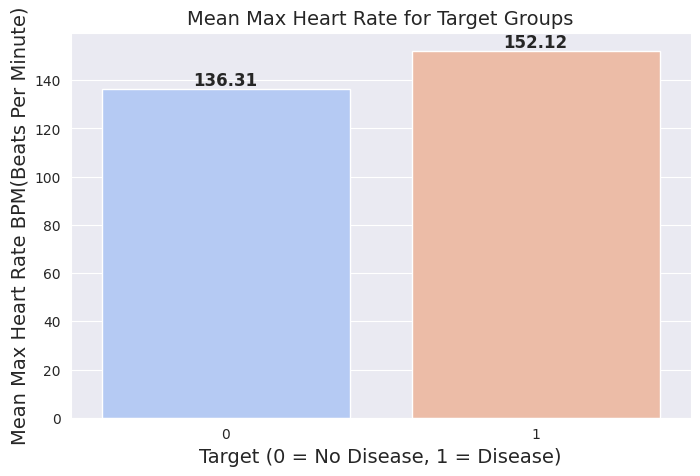

In [52]:
mean_hr = df4.groupby('target')['maxheartrate'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='target', y='maxheartrate', data=mean_hr, palette="coolwarm")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Add labels and title
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Mean Max Heart Rate BPM(Beats Per Minute)")
plt.title("Mean Max Heart Rate for Target Groups")

# Show the plot
plt.show()

<Figure size 800x500 with 0 Axes>

<ipython-input-53-6d78935e93d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='target', y='age', data=mean_hr, palette="coolwarm")


Text(0.0, 49.06666666666667, '49.07')

Text(1.0, 49.36896551724138, '49.37')

Text(0.5, 0, 'Target (0 = No Disease, 1 = Disease)')

Text(0, 0.5, 'Mean age')

Text(0.5, 1.0, 'Mean age for Target Groups')

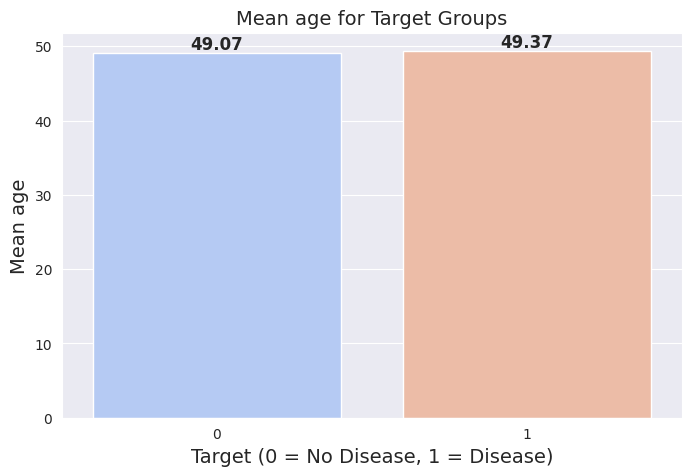

In [53]:
mean_hr = df4.groupby('target')['age'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='target', y='age', data=mean_hr, palette="coolwarm")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Add labels and title
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Mean age")
plt.title("Mean age for Target Groups")

# Show the plot
plt.show()

<Figure size 800x500 with 0 Axes>

<ipython-input-54-1f1f3a44a647>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='target', y='restingBP', data=mean_hr, palette="coolwarm")


Text(0.0, 134.76904761904763, '134.77')

Text(1.0, 164.04137931034484, '164.04')

Text(0.5, 0, 'Target (0 = No Disease, 1 = Disease)')

Text(0, 0.5, 'Mean restingBP ')

Text(0.5, 1.0, 'Mean restingBP  for Target Groups')

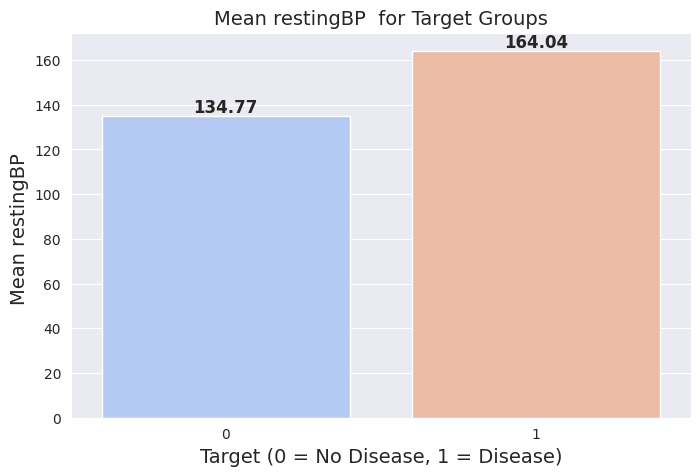

In [54]:
mean_hr = df4.groupby('target')['restingBP'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='target', y='restingBP', data=mean_hr, palette="coolwarm")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Add labels and title
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Mean restingBP ")
plt.title("Mean restingBP  for Target Groups")

# Show the plot
plt.show()

<Figure size 800x500 with 0 Axes>

<ipython-input-55-0ec2d0e808a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='target', y='serumcholestrol', data=mean_hr, palette="coolwarm")


Text(0.0, 281.0595238095238, '281.06')

Text(1.0, 333.451724137931, '333.45')

Text(0.5, 0, 'Target (0 = No Disease, 1 = Disease)')

Text(0, 0.5, 'Mean serumcholestrol  Rate')

Text(0.5, 1.0, 'Mean serumcholestrol for Target Groups')

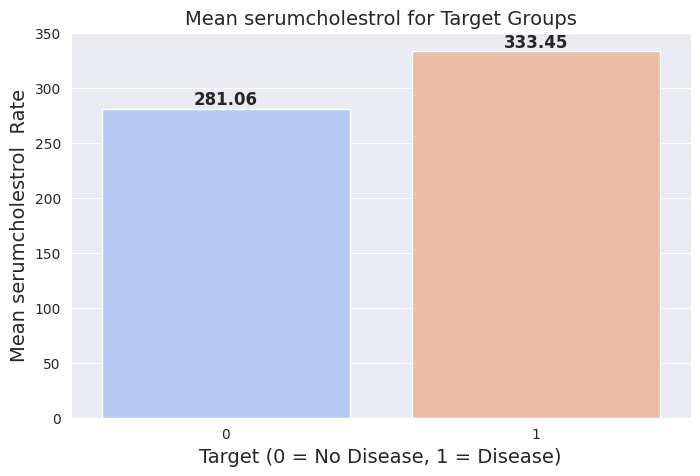

In [55]:
mean_hr = df4.groupby('target')['serumcholestrol'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='target', y='serumcholestrol', data=mean_hr, palette="coolwarm")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Add labels and title
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Mean serumcholestrol  Rate")
plt.title("Mean serumcholestrol for Target Groups")

# Show the plot
plt.show()

In [56]:
df4.shape

(1000, 29)

In [57]:
df4.head()

age  gender  restingBP  serumcholestrol  fastingbloodsugar  exerciseangia  \
0   53       1        171                0                  0              0   
1   40       1         94              229                  0              0   
2   49       1        133              142                  0              1   
3   43       1        138              295                  1              0   
4   31       1        199                0                  0              0   

   oldpeak  noofmajorvessels  target  chestpain_typical_angina  ...  \
0        5                 3       1                         0  ...   
1        3                 1       0                         1  ...   
2        5                 0       0                         0  ...   
3        3                 2       1                         1  ...   
4        5                 2       1                         0  ...   

   slope_downsloping  maxheartrate_gender_adjusted  BP_Cho_Interaction  \
0                  1                       163.333                   0   
1                  0                       127.778               21526   
2                  0                       224.444               18886   
3                  0                       170.000               40710   
4                  1                       151.111                   0   

   chestpain_typical_exerciseangina  Age_Bin  Oldpeak_Bin  Heart_Stress_Index  \
0                                 0        1            2               1.163   
1                                 0        0            1               0.817   
2                                 0        1            2               0.658   
3                                 0        1            1               0.902   
4                                 0        0            2               1.463   

   Vascular_Health  220-age  maxheartrate  
0                0      147           147  
1              229      160           115  
2                0      151           202  
3              590      157           153  
4                0      169           136  

[5 rows x 29 columns]

## Linear Regression

In [58]:
# Drop those variables that have high correlation with 'maxheartrate' because of the calculation.
X = df4.drop(columns=['maxheartrate',"maxheartrate_gender_adjusted","Heart_Stress_Index"])
y = df4['maxheartrate'].values.reshape(-1, 1)

train_ratio = 0.8
val_ratio = 0.10
test_ratio = 0.10

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)


# Define features to scale
all_features_to_scale = ['restingBP', 'serumcholestrol', 'oldpeak', 'age',
                         '220-age', 'BP_Cho_Interaction', 'Vascular_Health']

# Apply StandardScaler to selected features
scaler_X = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[all_features_to_scale] = scaler_X.fit_transform(X_train[all_features_to_scale])
X_val_scaled[all_features_to_scale] = scaler_X.transform(X_val[all_features_to_scale])
X_test_scaled[all_features_to_scale] = scaler_X.transform(X_test[all_features_to_scale])

# Check for NaNs in dataset
if X_train_scaled.isna().any().any():
    raise ValueError("Dataset contains NaN values. Please clean the data before training.")



model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on validation set
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f'The mean squred error of the linear model is {val_mse:.2f}, the R square value is {val_r2:.2f}')

model.intercept_, model.coef_

LinearRegression()

The mean squred error of the linear model is 1302.89, the R square value is 0.01


(array([134.16223158]),
 array([[ 1.67484427,  7.1968534 , -0.21651841, -1.73707867,  3.41736832,
          2.31922133, -5.08063355, -0.08955915,  8.34902632,  4.65901759,
          1.91289125,  2.57323554, -9.14514439, -0.85724071, -3.22655754,
          4.08379825, -3.26183358, -3.63982379,  2.17845843,  4.72319894,
          1.48416705, -0.43176307, -6.18311825,  6.32247955,  1.14959045,
         -1.67484427]]))

## RandomForestRegressor: threshold='mean'

In [59]:
# Train a Random Forest to determine feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select features based on importance threshold
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

# Train Linear Regression on selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'The mean squared error of the linear model with selected features is {val_mse:.2f}, the R square value is {val_r2:.2f}')

# Display selected feature indices
selected_features = selector.get_support(indices=True)
print(f'Selected features indices: {selected_features}')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


LinearRegression()

The mean squared error of the linear model with selected features is 1242.73, the R square value is 0.05
Selected features indices: [ 0  2  3  6  8 20 24 25]


## RandomForestRegressor: threshold='median'

In [60]:
# Train a Random Forest to determine feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select features based on importance threshold
selector = SelectFromModel(rf, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

# Train Linear Regression on selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'The mean squared error of the linear model with selected features is {val_mse:.2f}, the R square value is {val_r2:.2f}')

# Display selected feature indices
selected_features = selector.get_support(indices=True)
print(f'Selected features indices: {selected_features}')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


LinearRegression()

The mean squared error of the linear model with selected features is 1257.49, the R square value is 0.04
Selected features indices: [ 0  1  2  3  4  5  6  7  8 20 23 24 25]


## RandomForestRegressor: Select the top K most important features

In [61]:

# Step 1: Train a RandomForestRegressor to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 2: Get feature importances
importances = rf.feature_importances_

# Step 3: Select the top K most important features
k = 10  # Choose the top 10 most important features
top_k_indices = np.argsort(importances)[-k:]

# Step 4: Transform datasets to only include selected features
X_train_selected = X_train_scaled.iloc[:, top_k_indices]
X_val_selected = X_val_scaled.iloc[:, top_k_indices]

print(f"Top {k} features indices: {top_k_indices}")

# Step 5: Train a Linear Regression model with selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Step 6: Evaluate the model
y_val_pred = model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'The mean squared error of the linear model with selected features is {val_mse:.2f}, the R² value is {val_r2:.2f}')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Top 10 features indices: [ 7  1  8  6  0 25 24  3  2 20]


LinearRegression()

The mean squared error of the linear model with selected features is 1244.94, the R² value is 0.05


## Lasso Regulation

In [65]:


# Step 1: Train Lasso for Feature Selection
lasso = Lasso(alpha=0.01)  # Adjust alpha to control sparsity
lasso.fit(X_train_scaled, y_train)

# Step 2: Identify Selected Features
selected_features = np.where(lasso.coef_ != 0)[0]
print(f"Selected features: {selected_features}")

# Step 3: Transform Datasets Using Selected Features (Ensure Correct Indexing)
X_train_selected = X_train_scaled.iloc[:, selected_features]
X_val_selected = X_val_scaled.iloc[:, selected_features]

# Step 4: Train Linear Regression Model with Selected Features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Step 5: Evaluate the Model
y_val_pred = model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'The mean squared error of the linear model with selected features is {val_mse:.2f}, the R² value is {val_r2:.2f}')

Lasso(alpha=0.01)

Selected features: [ 0  1  2  3  4  5  6  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25]


LinearRegression()

The mean squared error of the linear model with selected features is 1303.02, the R² value is 0.01


## Ridge Regulation

In [66]:


# Step 1: Train Ridge Regression for Feature Selection
ridge = Ridge(alpha=1.0)  # Adjust alpha to control regularization
ridge.fit(X_train_scaled, y_train)

# Step 2: Identify Top K Most Important Features (Based on Absolute Coefficients)
k = 10  # Choose the top K most important features
top_k_indices = np.argsort(np.abs(ridge.coef_.ravel()))[-k:]  # Flatten to 1D

# Step 3: Transform Datasets Using Selected Features (Ensure Correct Indexing)
X_train_selected = X_train_scaled.iloc[:, top_k_indices]
X_val_selected = X_val_scaled.iloc[:, top_k_indices]

print(f"Top {k} selected feature indices: {top_k_indices}")

# Step 4: Train Linear Regression Model with Selected Features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Step 5: Evaluate the Model
y_val_pred = model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'The mean squared error of the linear model with selected features is {val_mse:.2f}, the R² value is {val_r2:.2f}')


Ridge()

Top 10 selected feature indices: [17 15  9 19  6 22 23  1  8 12]


LinearRegression()

The mean squared error of the linear model with selected features is 1264.63, the R² value is 0.04


##  RandomForestRegressor,  GradientBoostingRegressor,  XGBRegressor, SVR,  KNeighborsRegressor

In [67]:

# Define models to try
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel="rbf"),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val_scaled)

    # Calculate metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f'[{name}] Mean Squared Error: {val_mse:.2f}, R² Score: {val_r2:.2f}')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

[RandomForest] Mean Squared Error: 1464.50, R² Score: -0.11


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

[GradientBoosting] Mean Squared Error: 1442.06, R² Score: -0.10


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

[XGBoost] Mean Squared Error: 1681.95, R² Score: -0.28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

[SVR] Mean Squared Error: 1283.22, R² Score: 0.02


KNeighborsRegressor()

[KNN] Mean Squared Error: 1642.11, R² Score: -0.25


## Neural Networks

In [68]:


# Define the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),  # Two hidden layers (64 and 32 neurons)
                    activation='relu',  # ReLU activation function
                    solver='adam',  # Adam optimizer
                    learning_rate_init=0.01,  # Initial learning rate
                    max_iter=500,  # Increase iterations for better convergence
                    random_state=42)

# Train the MLP model
mlp.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = mlp.predict(X_val_scaled)

# Evaluate performance
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'[Neural Network] Mean Squared Error: {val_mse:.2f}, R² Score: {val_r2:.2f}')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate_init=0.01, max_iter=500,
             random_state=42)

[Neural Network] Mean Squared Error: 1527.38, R² Score: -0.16


## Linear Regression with PCA

In [69]:


# Step 1: Perform PCA for Dimensionality Reduction
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Print how much variance is retained
print(f"Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")

# Step 2: Train a Model (Example: Linear Regression)
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Step 3: Predict & Evaluate
y_val_pred = model.predict(X_val_pca)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'MSE after PCA: {val_mse:.2f}, R² after PCA: {val_r2:.2f}')


Explained Variance: 0.90


LinearRegression()

MSE after PCA: 1265.27, R² after PCA: 0.04


## Try PCA on other models

In [70]:

# Step 1: Apply PCA (Keep 95% variance)
pca = PCA(n_components=0.95)  # Dynamically chooses # of components to retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print(f"Selected number of PCA components: {pca.n_components_}")

# Step 2: Store results
pca_results = {
    "Model": [],
    "MSE": [],
    "R²": []
}

# Step 3: Define models
models = {
    "RandomForest with PCA": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting with PCA": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost with PCA": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR with PCA": SVR(kernel="rbf"),
    "KNeighbors with PCA": KNeighborsRegressor(n_neighbors=5),
    "Neural Network with PCA": MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',
                                            solver='adam', learning_rate_init=0.001,
                                            max_iter=1000, random_state=42)
}

# Step 4: Train and evaluate each model with PCA-transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_val_pred = model.predict(X_val_pca)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    pca_results["Model"].append(name)
    pca_results["MSE"].append(val_mse)
    pca_results["R²"].append(val_r2)

# Step 5: Convert results to a DataFrame and display
results_df = pd.DataFrame(pca_results)
# Display the results table
print(results_df)


Selected number of PCA components: 13


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

KNeighborsRegressor()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

                       Model          MSE        R²
0      RandomForest with PCA  1391.776891 -0.059257
1  GradientBoosting with PCA  1337.898462 -0.018251
2           XGBoost with PCA  1487.069214 -0.131783
3               SVR with PCA  1284.129366  0.022671
4        KNeighbors with PCA  1711.425200 -0.302536
5    Neural Network with PCA  2561.171653 -0.949264


## Grid search for Random Forest Regressor

In [71]:
rf_param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    "max_features": ["auto", "sqrt"],  # Number of features to consider for the best split
    "bootstrap": [True, False]  # Whether bootstrap samples are used
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train.ravel())  # Flatten y_train for compatibility

# Get best model
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Evaluate model
y_val_pred_rf = best_rf.predict(X_val_scaled)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

# Display results
best_rf_params, val_mse_rf, val_r2_rf

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
573 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

({'bootstrap': True,
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 50},
 1334.2750485575232,
 -0.015493702616909077)

## Grid search for Gradient Boosting Regressor

In [73]:


# Define hyperparameter grid for Gradient Boosting Regressor
gb_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1],  # Step size shrinkage
    "max_depth": [3, 5, 7],  # Maximum depth of individual estimators
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    "subsample": [0.8, 1.0],  # Fraction of samples for each estimator
    "max_features": ["auto", "sqrt", "log2"]  # Number of features to consider for best split
}

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search_gb = GridSearchCV(gb, gb_param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train.ravel())  # Flatten y_train for compatibility

# Get best model
best_gb = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_

# Evaluate model
y_val_pred_gb = best_gb.predict(X_val_scaled)
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

# Display results
best_gb_params, val_mse_gb, val_r2_gb


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1168 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

({'learning_rate': 0.01,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100,
  'subsample': 1.0},
 1267.657100933628,
 0.03520806713173796)

## Grid search for XGB Regressor

In [77]:

# Define hyperparameter grid for Gradient Boosting Regressor
gb_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1],  # Step size shrinkage
    "max_depth": [3, 5, 7],  # Maximum depth of individual estimators
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    "subsample": [0.8, 1.0],  # Fraction of samples for each estimator
    "max_features": ["auto", "sqrt", "log2"]  # Number of features to consider for best split
}

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search_gb = GridSearchCV(gb, gb_param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train.ravel())  # Flatten y_train for compatibility

# Get best model
best_gb = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_

# Evaluate model
y_val_pred_gb = best_gb.predict(X_val_scaled)
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

# Display results
best_gb_params, val_mse_gb, val_r2_gb


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1212 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

({'learning_rate': 0.01,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100,
  'subsample': 1.0},
 1267.657100933628,
 0.03520806713173796)

## Grid search for SVR

In [75]:
svr_param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Different kernel functions
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "gamma": ["scale", "auto"],  # Kernel coefficient
    "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
    "epsilon": [0.01, 0.1, 0.5, 1]  # Margin of tolerance
}

# Initialize SVR model
svr = SVR()

# Perform Grid Search
grid_search_svr = GridSearchCV(svr, svr_param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search_svr.fit(X_train_scaled, y_train.ravel())  # Flatten y_train for compatibility

# Get best model
best_svr = grid_search_svr.best_estimator_
best_svr_params = grid_search_svr.best_params_

# Evaluate model on validation set
y_val_pred_svr = best_svr.predict(X_val_scaled)
val_mse_svr = mean_squared_error(y_val, y_val_pred_svr)
val_r2_svr = r2_score(y_val, y_val_pred_svr)

# Display results
print(f"Best Parameters for SVR: {best_svr_params}")
print(f"Best SVR Mean Squared Error: {val_mse_svr:.2f}, Best R² Score: {val_r2_svr:.2f}")

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='r2')

Best Parameters for SVR: {'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVR Mean Squared Error: 1287.73, Best R² Score: 0.02


## Grid search for KNeighbour parameters

In [76]:


# Define hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 10, 20, 50],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 20, 30, 50],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Initialize model
knn = KNeighborsRegressor()

# Perform Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate model
y_val_pred = best_knn.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Best KNN Mean Squared Error: {val_mse:.2f}, Best R² Score: {val_r2:.2f}')


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 5, 10, 20, 50], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}
Best KNN Mean Squared Error: 1285.75, Best R² Score: 0.02


## Grid search for Neural Networks

## Try all other modles after Feature Selection using Random Forest Regressor (threshold='mean')

In [79]:

# Define selected feature indices
selected_feature_indices = [0, 2, 3, 6, 8, 20, 24, 25]  # Adjust based on correct column positions

# Drop correlated variables
X = df4.drop(columns=['maxheartrate', "maxheartrate_gender_adjusted", "Heart_Stress_Index"])
y = df4['maxheartrate'].values.reshape(-1, 1)

# Use column positions after dropping variables
selected_features = X.columns[selected_feature_indices]
X_selected = X[selected_features]

# Split data
train_ratio = 0.8
val_ratio = 0.10
test_ratio = 0.10

X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

# Features to scale
all_features_to_scale = ['restingBP', 'serumcholestrol', 'oldpeak', 'age', '220-age', 'BP_Cho_Interaction', 'Vascular_Health']
scaler_X = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Ensure only existing selected features are scaled
features_to_scale = [feature for feature in all_features_to_scale if feature in X_selected.columns]
X_train_scaled[features_to_scale] = scaler_X.fit_transform(X_train[features_to_scale])
X_val_scaled[features_to_scale] = scaler_X.transform(X_val[features_to_scale])
X_test_scaled[features_to_scale] = scaler_X.transform(X_test[features_to_scale])

# Check for NaNs
if X_train_scaled.isna().any().any():
    raise ValueError("Dataset contains NaN values. Please clean the data before training.")

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, bootstrap=True,max_depth=10, max_features= 'sqrt',
                                          random_state=42, min_samples_leaf= 4, min_samples_split= 10),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3,
                                                  min_samples_leaf= 4,  min_samples_split= 2, subsample= 1.0, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=3,
                            max_features= 'sqrt', random_state=42,min_samples_leaf= 4,  min_samples_split= 2, subsample= 1.0 ),

    "SVR": SVR(C=1, degree=2, epsilon= 1, gamma= 'scale', kernel= 'linear'),
    "KNN": KNeighborsRegressor(n_neighbors=50, weights='uniform', algorithm ='auto', leaf_size = 10,  p= 2,)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f'[{name}] Mean Squared Error: {val_mse:.2f}, R² Score: {val_r2:.2f}')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200, random_state=42)

[RandomForest] Mean Squared Error: 1345.96, R² Score: -0.02


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=4,
                          random_state=42)

[GradientBoosting] Mean Squared Error: 1255.81, R² Score: 0.04


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_features='sqrt',
             max_leaves=None, min_child_weight=None, min_samples_leaf=4,
             min_samples_split=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, ...)

[XGBoost] Mean Squared Error: 1257.60, R² Score: 0.04


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, degree=2, epsilon=1, kernel='linear')

[SVR] Mean Squared Error: 1256.84, R² Score: 0.04


KNeighborsRegressor(leaf_size=10, n_neighbors=50)

[KNN] Mean Squared Error: 1281.86, R² Score: 0.02
